# <span style="color:Blue"><center>Predict The Flight Ticket Price Hackathon</center></span>

## <span style="color:Blue">Introduction</span>

### <span style="color:green">Features</span>

## <span style="color:Blue">Objective</span>

## <span style="color:Blue">Libraries</span>

In [1]:
import numpy as np # Used for working with arrays.
# Pandas: It is made mainly for working with relational or labeled data both easily and intuitively. 
# It provides various data structures and operations for manipulating numerical data and time series.
import pandas as pd # It is used to analyze data
# Seaborn mostly used for statistical plotting in Python. 
# It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.
import seaborn as sns
import plotly.express as px # Contain a function that cretae entire figure at once.
import matplotlib.pyplot as plt # Amazing visualization library in Python for 2D plots of arrays.
import warnings # Warning is useful to alert the user of some condition in a program, where that condition (normally) doesn't warrant raising an exception and terminating the program.
warnings.filterwarnings('ignore') # To ignore all warnings by setting ‘ignore’ as a parameter.
print('Libraries imported') 
sns.set()

Libraries imported


## <span style="color:Blue">Data Preparation</span>

In [2]:
# Read csv file and create dataframe
train_df = pd.read_excel('Data_Train.xlsx') # Read train file
test_df= pd.read_excel('Test_set.xlsx') # Read test file
sub_df=pd.read_excel('Sample_submission.xlsx') # Required format for submission in Hackathon
# Copy the dataframe for further use
df = train_df.copy()
df1 = test_df.copy()
df2 = sub_df.copy()

In [3]:
df.head() # To see the fisrt 5 rows of training dataset

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
df.sample(10) # 10 random sample data 

Airline Date_of_Journey    Source Destination  \
4151       IndiGo      15/04/2019     Delhi      Cochin   
1831       IndiGo       3/04/2019  Banglore       Delhi   
4028  Jet Airways      12/06/2019     Delhi      Cochin   
5363    Air India      21/03/2019     Delhi      Cochin   
2948  Jet Airways      12/05/2019   Kolkata    Banglore   
7988  Jet Airways      24/05/2019   Kolkata    Banglore   
693        IndiGo      03/03/2019  Banglore   New Delhi   
2211  Jet Airways       9/06/2019     Delhi      Cochin   
1429     SpiceJet      24/03/2019   Kolkata    Banglore   
3394     SpiceJet      03/03/2019  Banglore   New Delhi   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
4151        DEL → HYD → COK    08:35         16:10   7h 35m      1 stop   
1831              BLR → DEL    22:10  01:00 04 Apr   2h 50m    non-stop   
4028  DEL → ATQ → BOM → COK    12:15  12:35 13 Jun  24h 20m     2 stops   
5363  DEL → AMD → BOM → COK    19:45  19:15 22 Mar  23h 30m     2 stops   
2948        CCU → GAU → BLR    10:20         17:35   7h 15m      1 stop   
7988        CCU → BOM → BLR    14:05         23:35   9h 30m      1 stop   
693         BLR → LKO → DEL    05:25         10:10   4h 45m      1 stop   
2211  DEL → JAI → BOM → COK    09:40  04:25 10 Jun  18h 45m     2 stops   
1429              CCU → BLR    22:20  00:40 25 Mar   2h 20m    non-stop   
3394              BLR → DEL    09:35         12:30   2h 55m    non-stop   

     Additional_Info  Price  
4151         No info   6442  
1831         No info   3943  
4028         No info  14300  
5363         No info   8236  
2948         No info   9358  
7988         No info  14571  
693          No info   7774  
2211         No info  13014  
1429         No info   5831  
3394         No info   6860

In [5]:
df1.head() # To see the fisrt 5 rows of testing data

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [6]:
df2.head() # To see the first 5 rows of submission data

Price
0  15998
1  16612
2  25572
3  25778
4  16934

In [118]:
df2.shape

(2671, 1)

In [119]:
df2.dtypes

Price    int64
dtype: object

In [7]:
df.info() # To get the information of dataset, type of features, memory uses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.shape # To check the shape of data frame

(10683, 11)

In [9]:
df.describe() # To describe the data frame (only price is numerical data, others are object)

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

#### Missings And Duplicates Values

In [10]:
# Print number of rows of each attributes for which the value is NULL.
print(df.isna().sum().sort_values(ascending = False))
# Print number of duplicate rows considering all column features in dataframe
print('Number of Duplicate Values in df : ' ,df.duplicated().sum() )

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64
Number of Duplicate Values in df :  220


In [11]:
print('In Test Dataset')
# Print number of rows of each attributes for which the value is NULL.
print(df1.isna().sum().sort_values(ascending = False))
# Print number of duplicate rows considering all column features in dataframe
print('Number of Duplicate Values in df1 : ' ,df1.duplicated().sum() )

In Test Dataset
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Number of Duplicate Values in df1 :  26


In [12]:
df=df.drop_duplicates() # Delete all the duplicate rows considering all column wise.
df.shape # Shape of data frame is reduced.

(10463, 11)

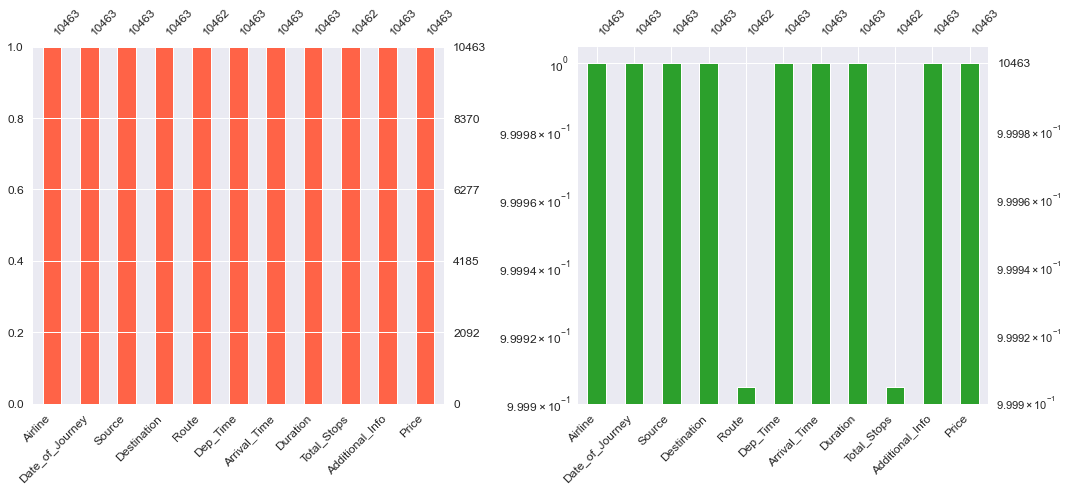

In [13]:
# Missing value check in plot
# !pip install missingno # first required to install this library 
import missingno as msno

fig = plt.figure(figsize=(15,7)) # Size of complete figure
# Normal Axis
ax1 = fig.add_subplot(1,2,1) # Created subplots in 1 rows and 2 columns
msno.bar(df, color="tomato", fontsize=12, ax=ax1); # Define size of bar
# Logrithmic Y-Axis
ax2 = fig.add_subplot(1,2,2) # Created subplots in 1 rows and 2 columns
msno.bar(df, log=True, color="tab:green", fontsize=12, ax=ax2); # Define size of bar

plt.tight_layout() # Show the layout

In [14]:
# Check the missing value of route and total stops from same row or not
df[df['Route'].isna() | df['Total_Stops'].isna()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

In [15]:
# Drop the null values
df.dropna(inplace= True)
# Check null values again
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
# Print number of rows of each attributes for which the value is NULL.
print(df.isna().sum().sort_values(ascending = False))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [17]:
# Shape of dataframe
df.shape

(10462, 11)

## <span style="color:Blue">EDA & Feature Engineering</span>

### <span style="color:green">Features Engineering</span>

### Convert Duration

In [18]:
# Convert Duration coulumn into minutes
def convert_duration(duration):
    if len(duration.split())==2:
        hours = int(duration.split()[0][:-1]) # 1st index of duration is hour
        minutes= int(duration.split()[1][:-1]) # 2nd index of duration is minutes
        return hours*60+minutes # Convert all into minutes
    else:
        return int(duration[:-1])*60 # If no hour index

In [19]:
# Calling the conversion function
df['Duration_in_Minutes'] = df['Duration'].apply(convert_duration)
# Drop the previous useless column
df.drop(['Duration'], axis=1, inplace=True)
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar    non-stop         No info   3897   
1    05:50         13:15     2 stops         No info   7662   
2    09:25  04:25 10 Jun     2 stops         No info  13882   
3    18:05         23:30      1 stop         No info   6218   
4    16:50         21:35      1 stop         No info  13302   

   Duration_in_Minutes  
0                  170  
1                  445  
2                 1140  
3                  325  
4                  285

In [20]:
print('In Testdataset')
# Calling the conversion function
df1['Duration_in_Minutes'] = df1['Duration'].apply(convert_duration)
# Drop the previous useless column
df1.drop(['Duration'], axis=1, inplace=True)
df1.head()

In Testdataset


Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Total_Stops              Additional_Info  \
0    17:30  04:25 07 Jun      1 stop                      No info   
1    06:20         10:20      1 stop                      No info   
2    19:15  19:00 22 May      1 stop  In-flight meal not included   
3    08:00         21:00      1 stop                      No info   
4    23:55  02:45 25 Jun    non-stop                      No info   

   Duration_in_Minutes  
0                  655  
1                  240  
2                 1425  
3                  780  
4                  170

### Departure Time & Arrival Time

In [21]:
# Convert datatype of dep and arrival time into datetime format
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
# Data Types of features
df.dtypes

Airline                        object
Date_of_Journey                object
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Total_Stops                    object
Additional_Info                object
Price                           int64
Duration_in_Minutes             int64
dtype: object

In [22]:
# Create departure and arrival time into minute and hour into different column
df['Dep_Time_in_hours'] = df['Dep_Time'].dt.hour
df['Dep_Time_in_minutes'] = df['Dep_Time'].dt.minute
df['Arrival_Time_in_hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Time_in_minutes'] = df['Arrival_Time'].dt.minute

In [23]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Total_Stops Additional_Info  Price  \
0 2023-02-11 22:20:00 2023-03-22 01:10:00    non-stop         No info   3897   
1 2023-02-11 05:50:00 2023-02-11 13:15:00     2 stops         No info   7662   
2 2023-02-11 09:25:00 2023-06-10 04:25:00     2 stops         No info  13882   
3 2023-02-11 18:05:00 2023-02-11 23:30:00      1 stop         No info   6218   
4 2023-02-11 16:50:00 2023-02-11 21:35:00      1 stop         No info  13302   

   Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0                  170                 22                   20   
1                  445                  5                   50   
2                 1140                  9                   25   
3                  325                 18                    5   
4                  285                 16                   50   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  
0                      1                       10  
1                     13                       15  
2                      4                       25  
3                     23                       30  
4                     21                       35

In [24]:
# Drop Dep_Time and Arrival_Time features
df.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Total_Stops Additional_Info  Price  Duration_in_Minutes  Dep_Time_in_hours  \
0    non-stop         No info   3897                  170                 22   
1     2 stops         No info   7662                  445                  5   
2     2 stops         No info  13882                 1140                  9   
3      1 stop         No info   6218                  325                 18   
4      1 stop         No info  13302                  285                 16   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  
0                   20                      1                       10  
1                   50                     13                       15  
2                   25                      4                       25  
3                    5                     23                       30  
4                   50                     21                       35

In [25]:
print('In Testdataset')
# Convert datatype of dep and arrival time into datetime format
df1['Dep_Time']=pd.to_datetime(df1['Dep_Time'])
df1['Arrival_Time']=pd.to_datetime(df1['Arrival_Time'])
# Create departure and arrival time into minute and hour into different column
df1['Dep_Time_in_hours'] = df1['Dep_Time'].dt.hour
df1['Dep_Time_in_minutes'] = df1['Dep_Time'].dt.minute
df1['Arrival_Time_in_hours'] = df1['Arrival_Time'].dt.hour
df1['Arrival_Time_in_minutes'] = df1['Arrival_Time'].dt.minute
# Drop Dep_Time and Arrival_Time features
df1.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
df1.head()

In Testdataset


Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Total_Stops              Additional_Info  Duration_in_Minutes  \
0      1 stop                      No info                  655   
1      1 stop                      No info                  240   
2      1 stop  In-flight meal not included                 1425   
3      1 stop                      No info                  780   
4    non-stop                      No info                  170   

   Dep_Time_in_hours  Dep_Time_in_minutes  Arrival_Time_in_hours  \
0                 17                   30                      4   
1                  6                   20                     10   
2                 19                   15                     19   
3                  8                    0                     21   
4                 23                   55                      2   

   Arrival_Time_in_minutes  
0                       25  
1                       20  
2                        0  
3                        0  
4                       45

### Date of Journey

In [26]:
# Convert the data type into datetime format
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Total_Stops Additional_Info  Price  Duration_in_Minutes  Dep_Time_in_hours  \
0    non-stop         No info   3897                  170                 22   
1     2 stops         No info   7662                  445                  5   
2     2 stops         No info  13882                 1140                  9   
3      1 stop         No info   6218                  325                 18   
4      1 stop         No info  13302                  285                 16   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  
0                   20                      1                       10  
1                   50                     13                       15  
2                   25                      4                       25  
3                    5                     23                       30  
4                   50                     21                       35

In [27]:
# Check, weather year of date of journey is unique or not.
df['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [28]:
# Extracted day and month column from Date_of_Journey column
df['Day']= df['Date_of_Journey'].dt.day
df['Month']= df['Date_of_Journey'].dt.month
# Drop the useless column Date_of_Journey
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Duration_in_Minutes  Dep_Time_in_hours  \
0         No info   3897                  170                 22   
1         No info   7662                  445                  5   
2         No info  13882                 1140                  9   
3         No info   6218                  325                 18   
4         No info  13302                  285                 16   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  \
0                   20                      1                       10   24   
1                   50                     13                       15    5   
2                   25                      4                       25    6   
3                    5                     23                       30    5   
4                   50                     21                       35    3   

   Month  
0      3  
1      1  
2      9  
3     12  
4      1

In [29]:
print('In Testdataset')
# Convert the data type into datetime format
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'])
# Check, weather year of date of journey is unique or not.
df1['Date_of_Journey'].dt.year.unique()
# Extracted day and month column from Date_of_Journey column
df1['Day'] = df1['Date_of_Journey'].dt.day
df1['Month'] = df1['Date_of_Journey'].dt.month
# Drop the useless column Date_of_Journey
df1.drop(['Date_of_Journey'], axis=1, inplace=True)
df1.head()

In Testdataset


Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info  Duration_in_Minutes  Dep_Time_in_hours  \
0                      No info                  655                 17   
1                      No info                  240                  6   
2  In-flight meal not included                 1425                 19   
3                      No info                  780                  8   
4                      No info                  170                 23   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  \
0                   30                      4                       25    6   
1                   20                     10                       20    5   
2                   15                     19                        0   21   
3                    0                     21                        0   21   
4                   55                      2                       45   24   

   Month  
0      6  
1     12  
2      5  
3      5  
4      6

### Additional Info

In [30]:
# Check the category in Additional_Info feature
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# Drop Additional_Info feature
df.drop('Additional_Info', axis=1, inplace=True)
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

   Price  Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0   3897                  170                 22                   20   
1   7662                  445                  5                   50   
2  13882                 1140                  9                   25   
3   6218                  325                 18                    5   
4  13302                  285                 16                   50   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  Month  
0                      1                       10   24      3  
1                     13                       15    5      1  
2                      4                       25    6      9  
3                     23                       30    5     12  
4                     21                       35    3      1

In [32]:
# Check the number of features which datatype = Object
df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops'], dtype='object')

In [33]:
print('In Testdataset')
# Check the category in Additional_Info feature
df1['Additional_Info'].value_counts()
# Drop Additional_Info feature
df1.drop('Additional_Info', axis=1, inplace=True)
# Check the number of features which datatype = Object
df1.select_dtypes(['object']).columns
df1.head()

In Testdataset


Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

   Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0                  655                 17                   30   
1                  240                  6                   20   
2                 1425                 19                   15   
3                  780                  8                    0   
4                  170                 23                   55   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  Month  
0                      4                       25    6      6  
1                     10                       20    5     12  
2                     19                        0   21      5  
3                     21                        0   21      5  
4                      2                       45   24      6

### <span style="color:green">Univariate Analysis with Categorical Features</span>

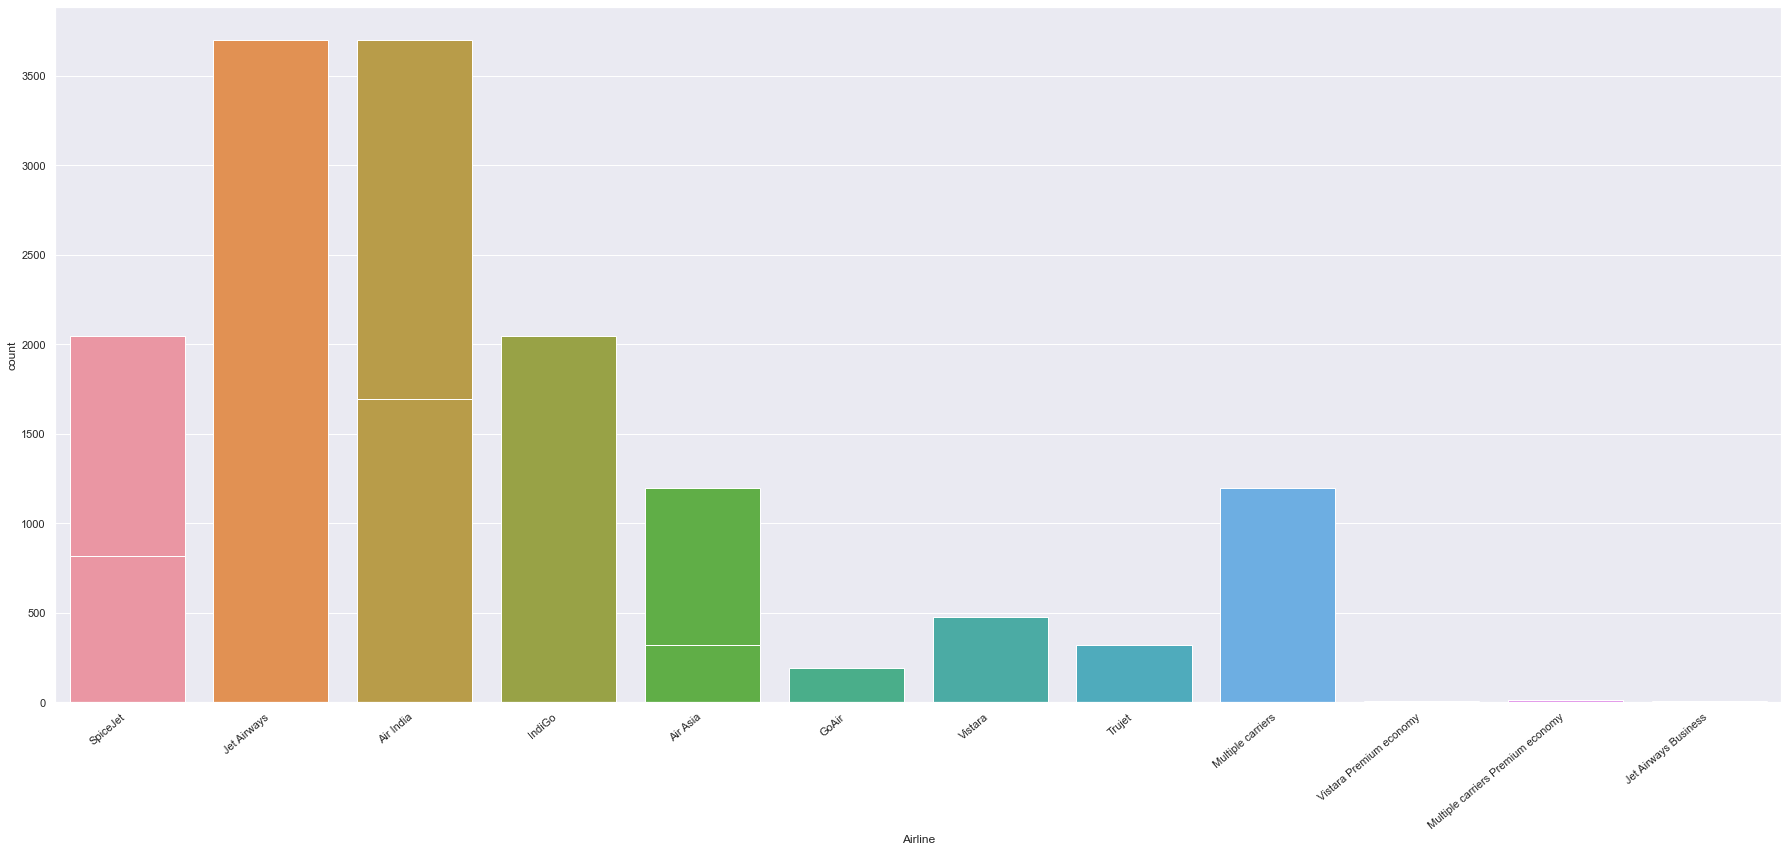

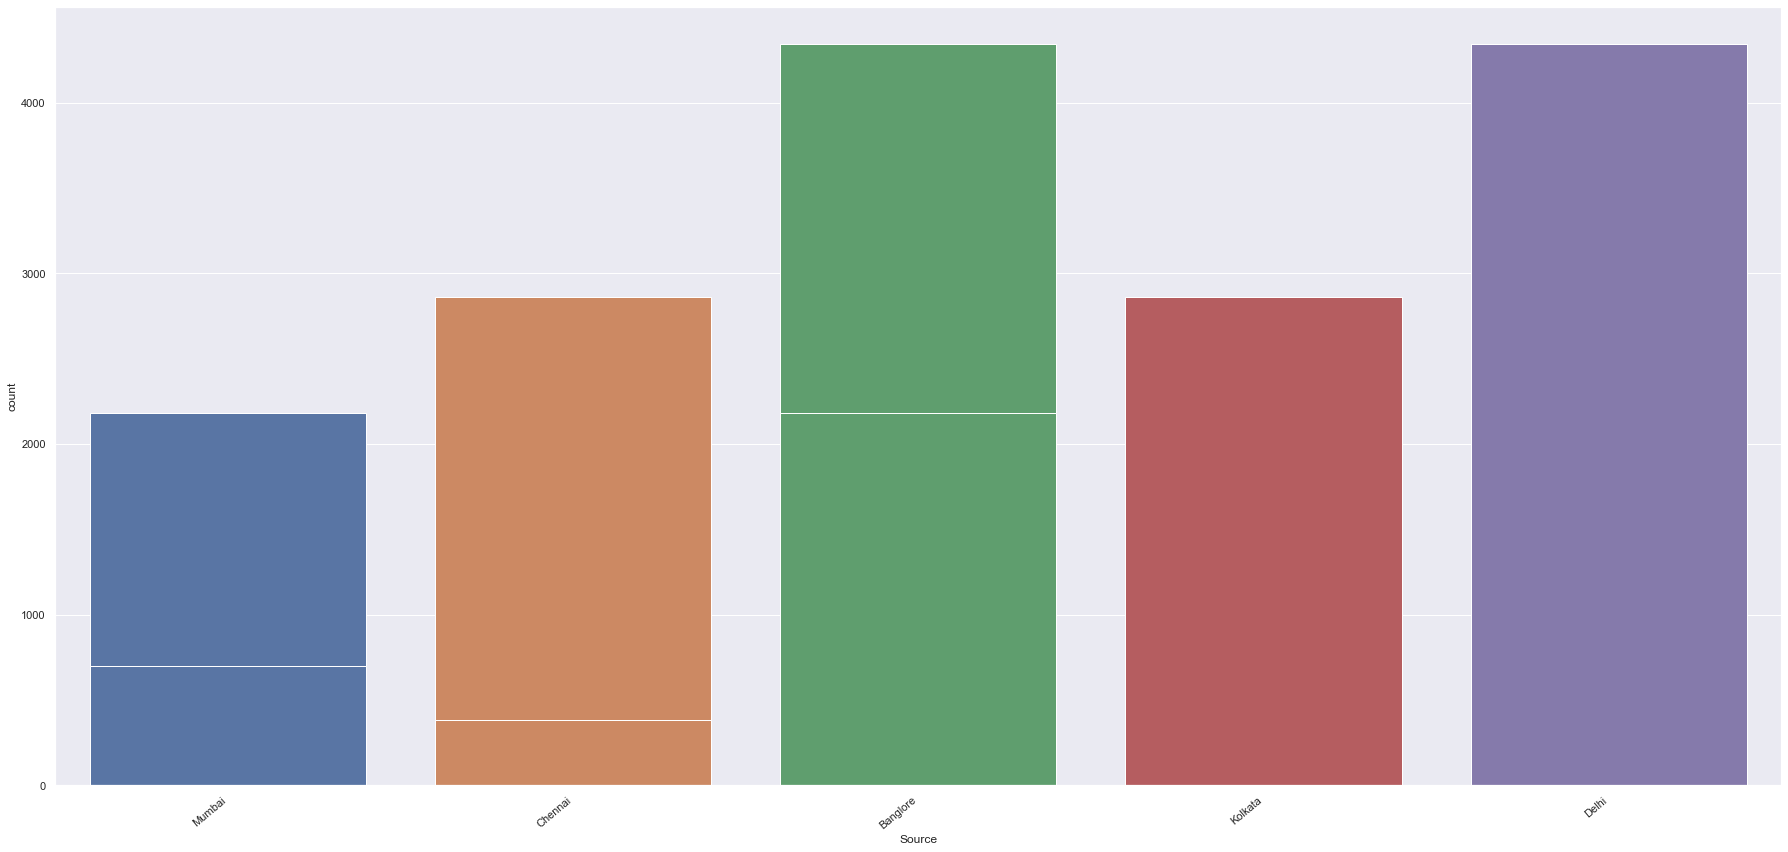

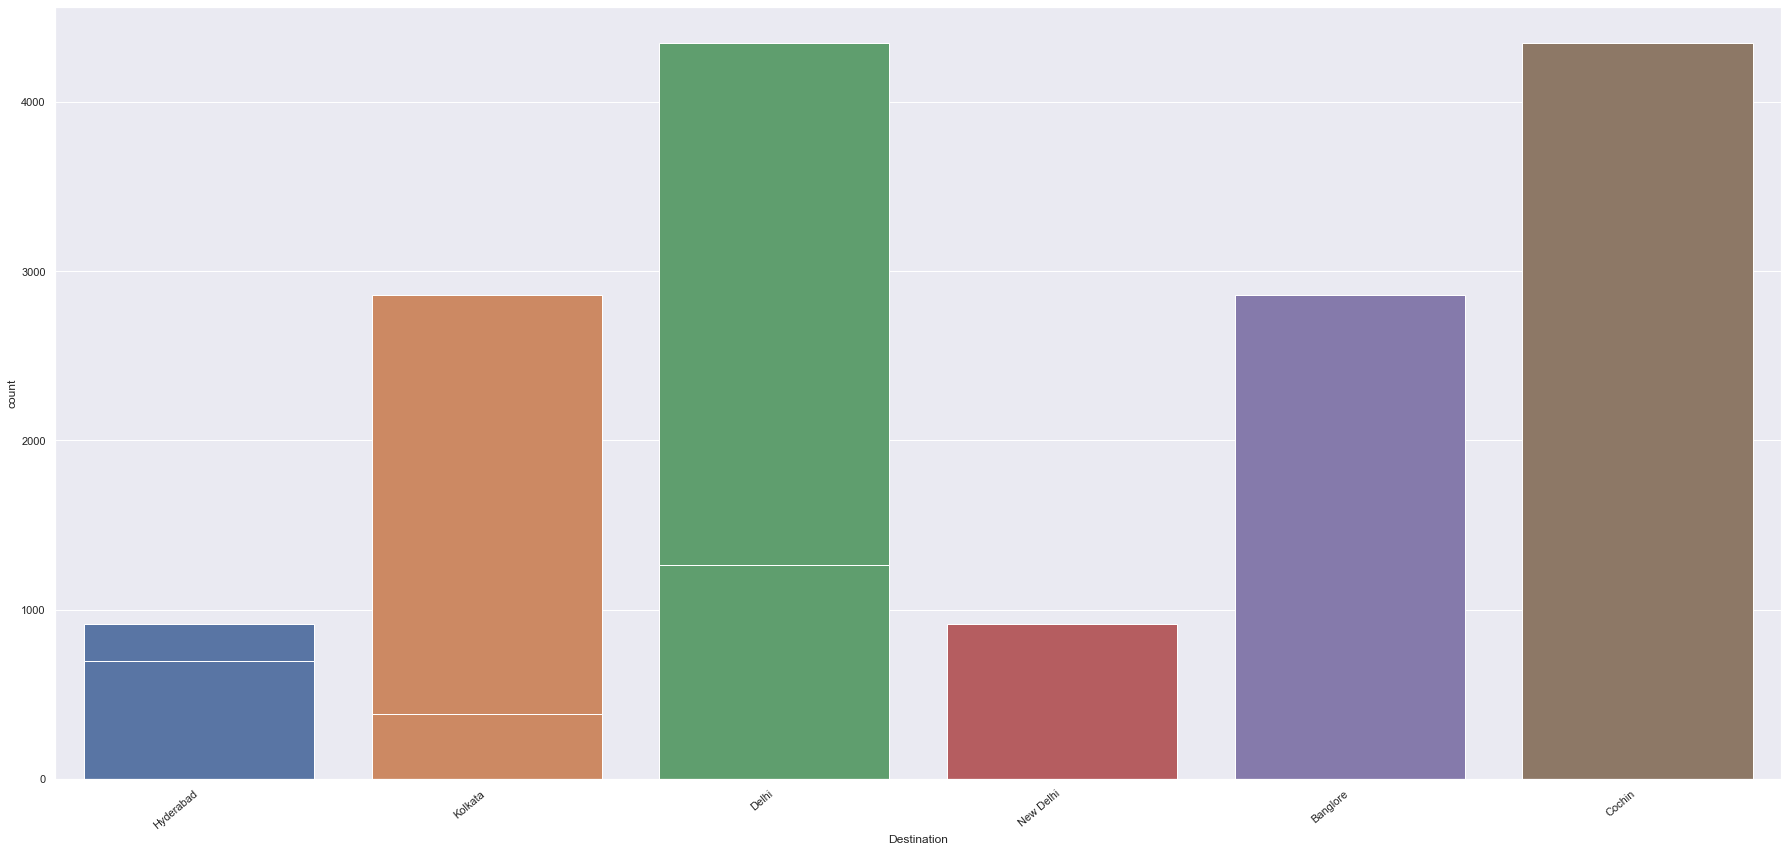

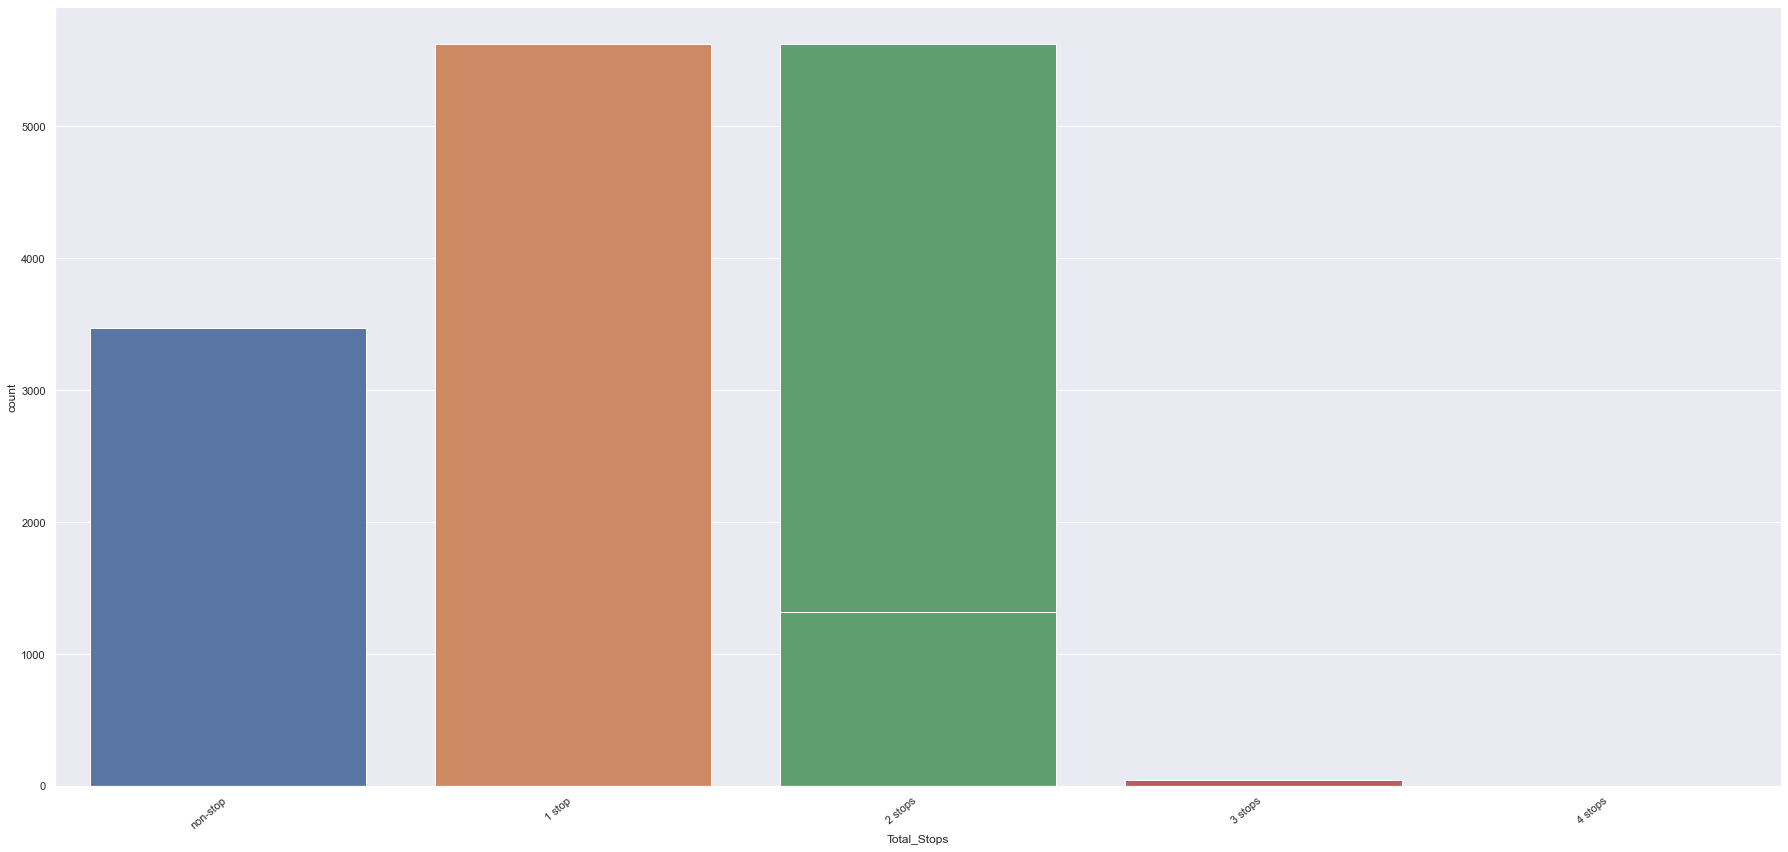

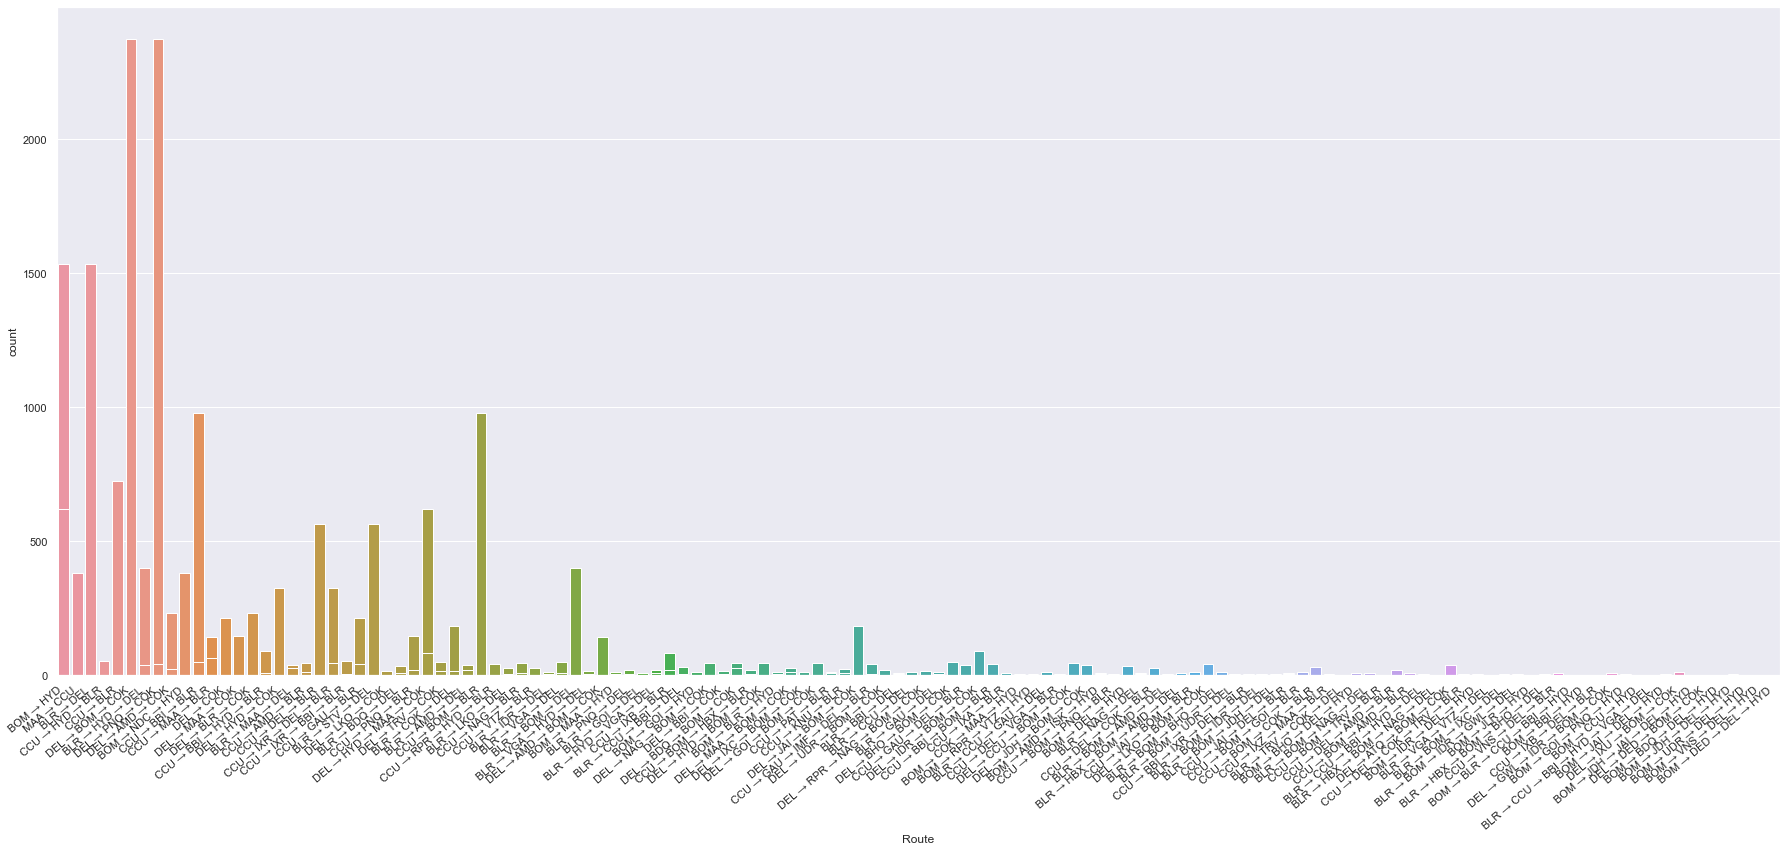

In [34]:
# Univariate Analysis with categorical features 
# ('Airline', 'Source', 'Destination', 'Total_Stops', 'Route')
for i in ['Airline', 'Source', 'Destination', 'Total_Stops','Route']:
    plt.figure(figsize=(25,12))
    sns.countplot(data=df, x=i)
    axis = sns.countplot(x=i,data=df.sort_values('Price',ascending=True))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

#### Insights

### <span style="color:green">Bivariate Analysis with Categorical Features</span>

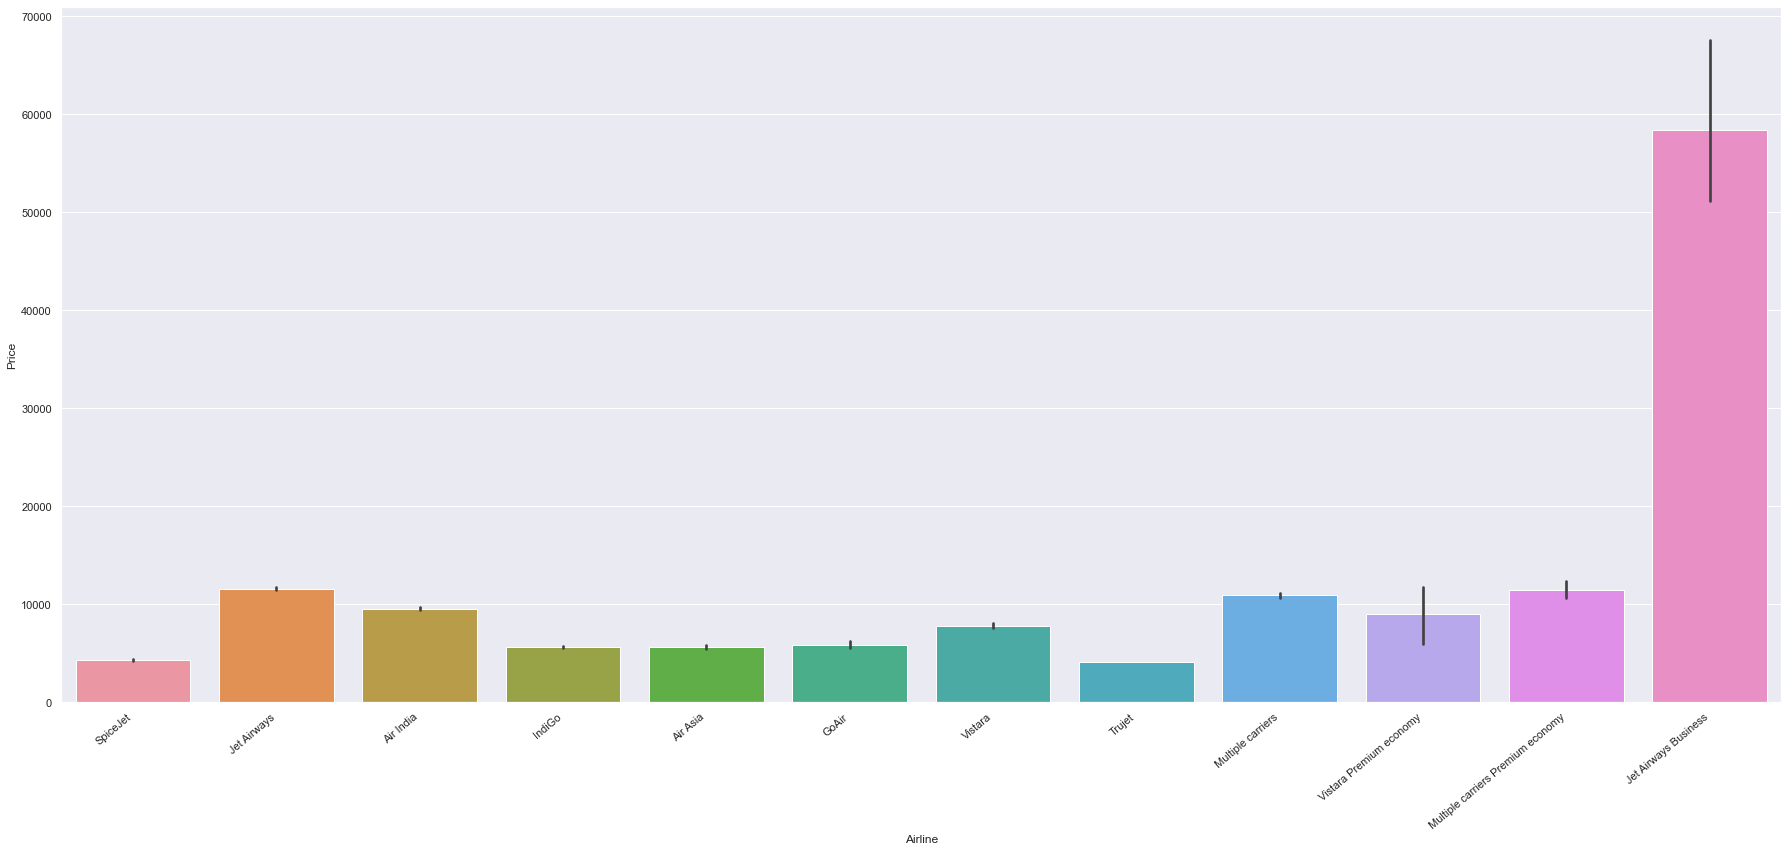

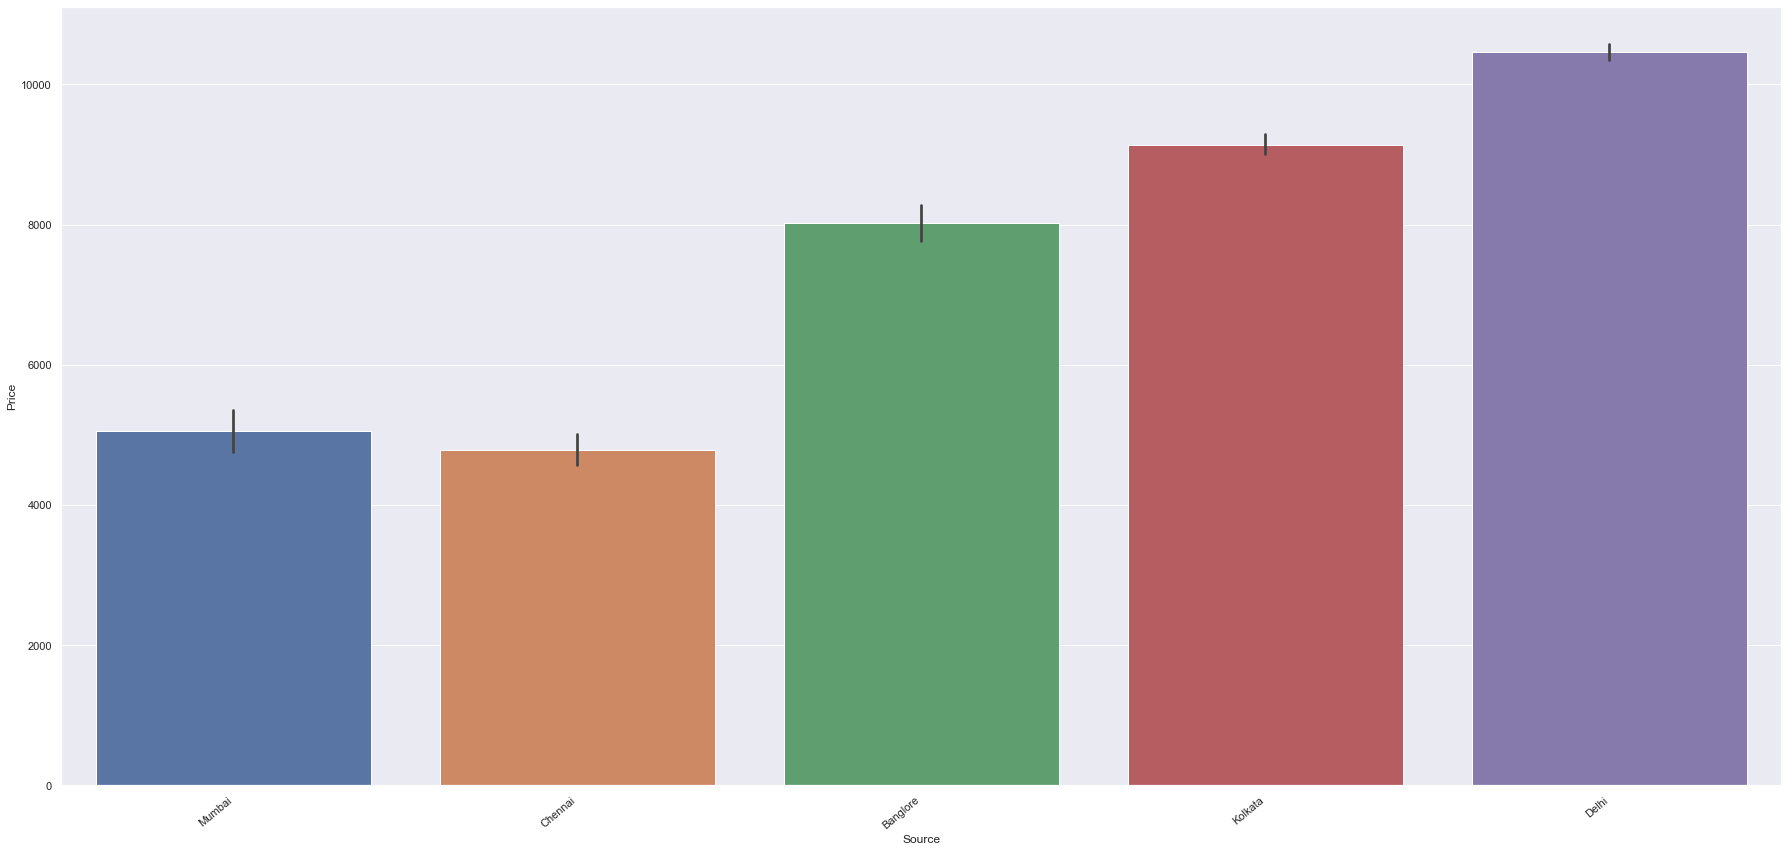

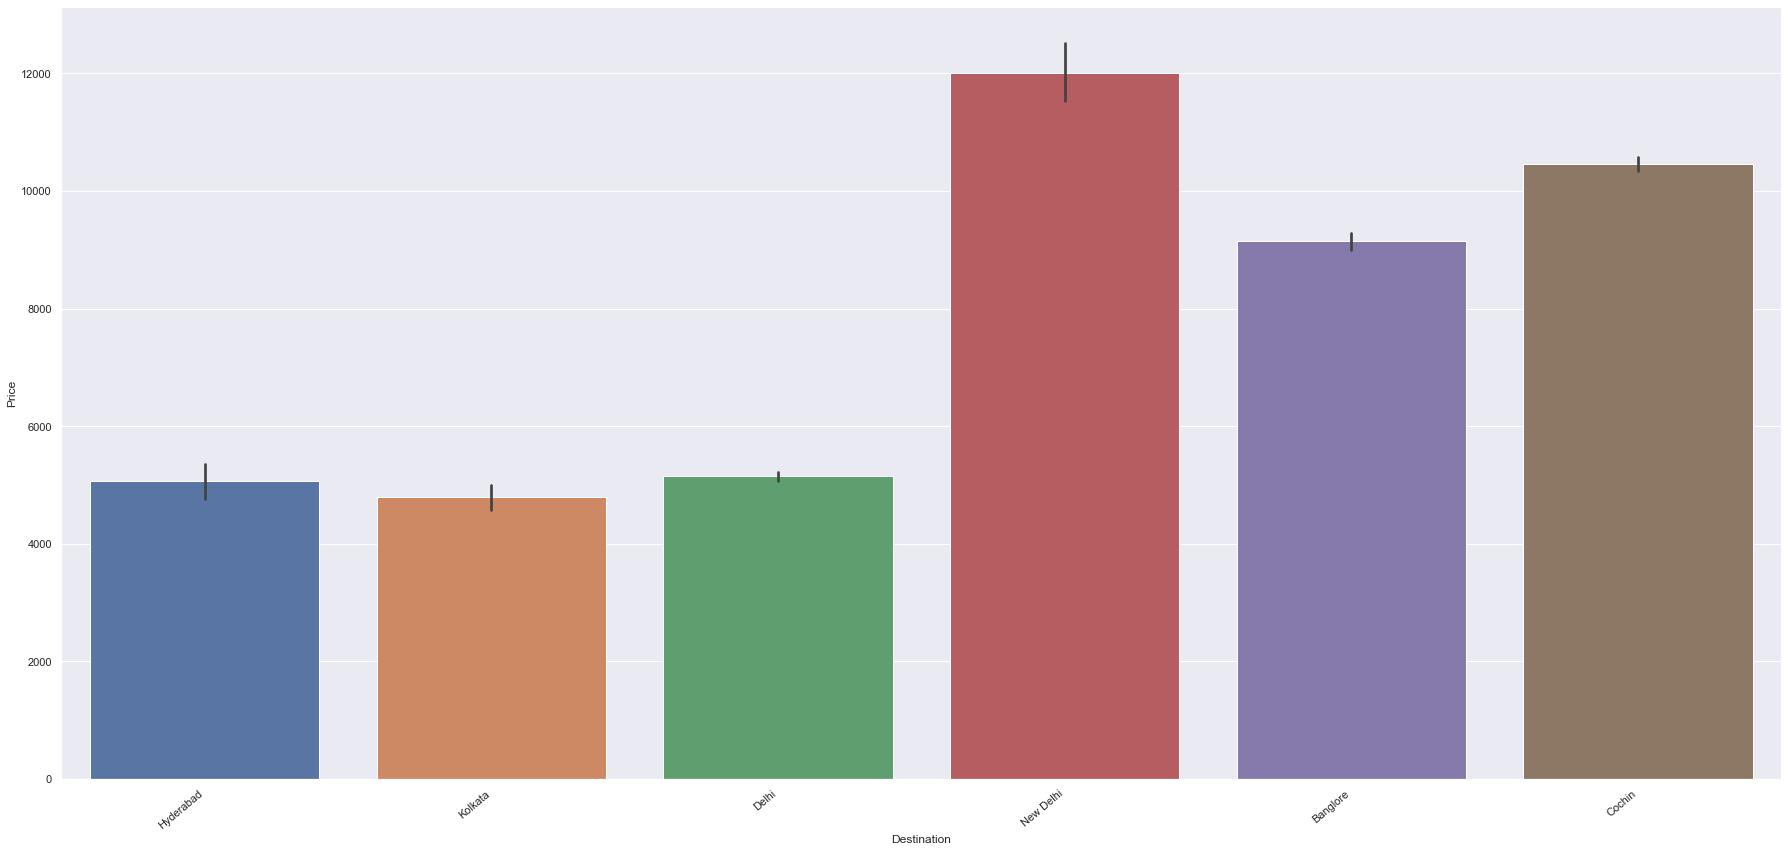

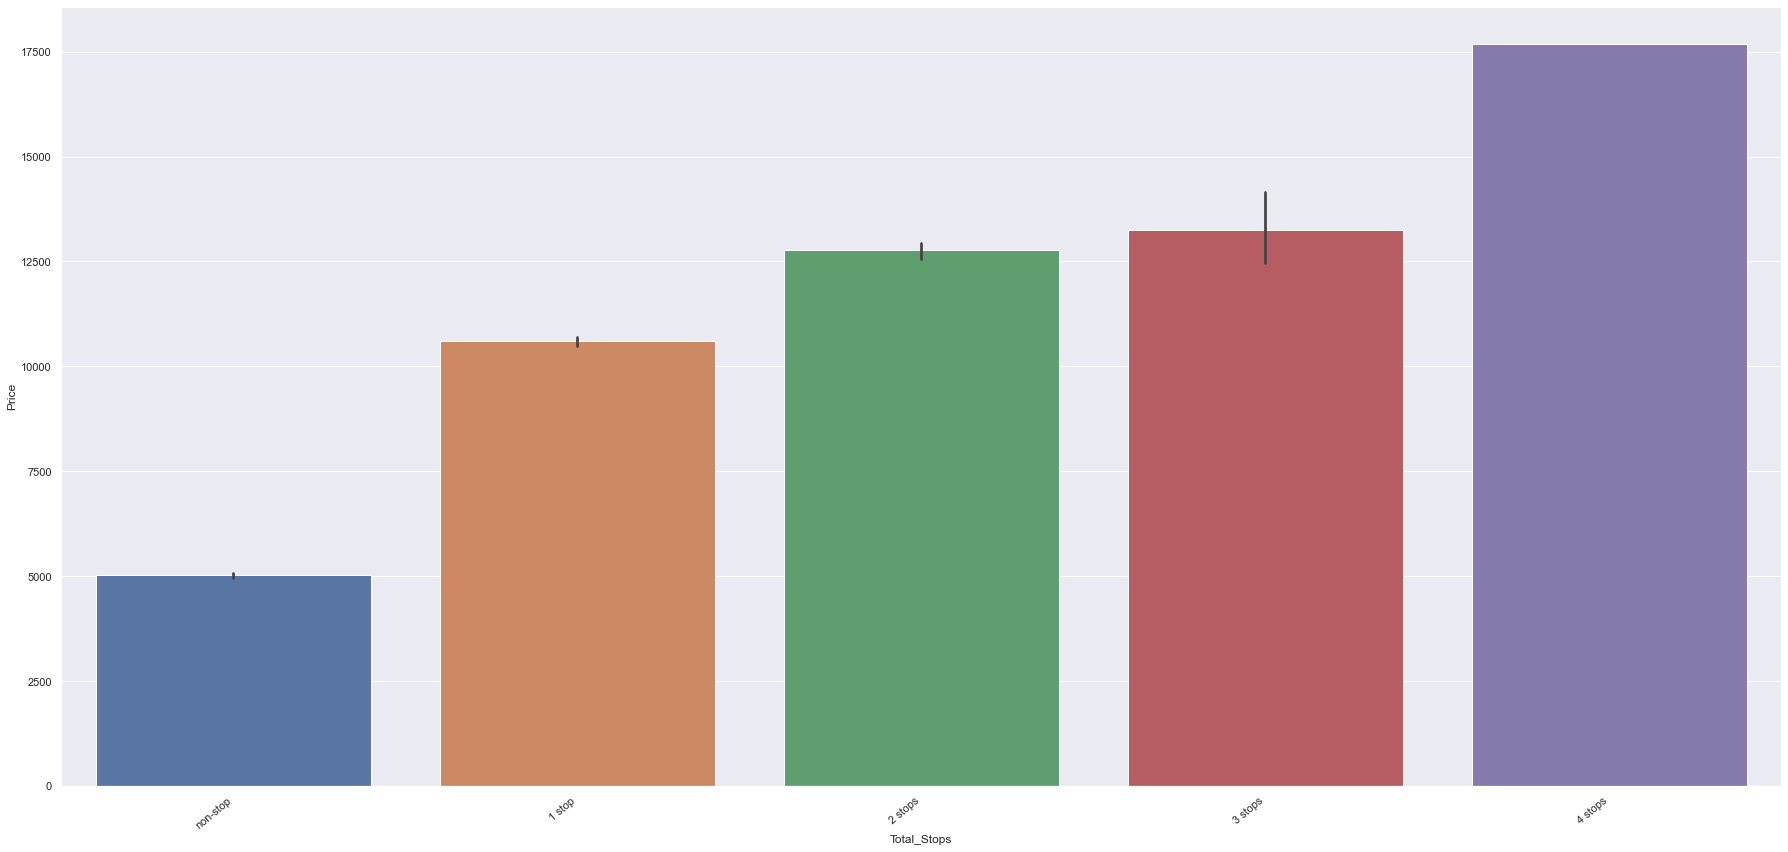

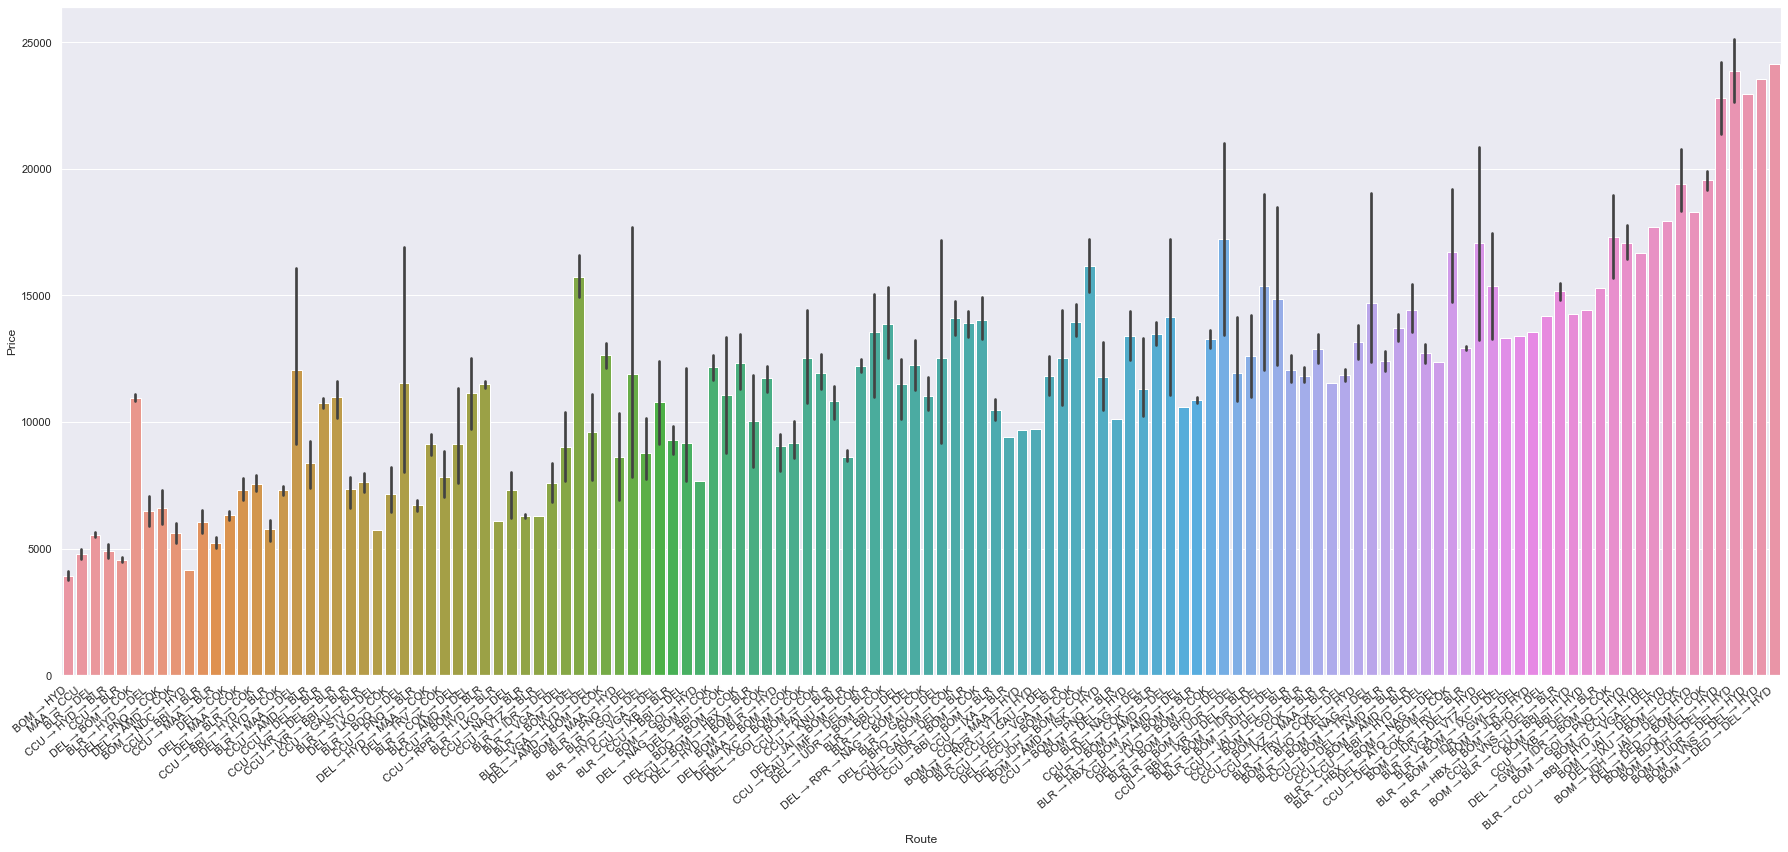

In [35]:
# Bivariate Analysis of categorical features with Price (Bar Plot)
for i in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']:
    plt.figure(figsize=(25,12))
    axis = sns.barplot(x=i,y='Price',data=df.sort_values('Price',ascending=True))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

#### Insights

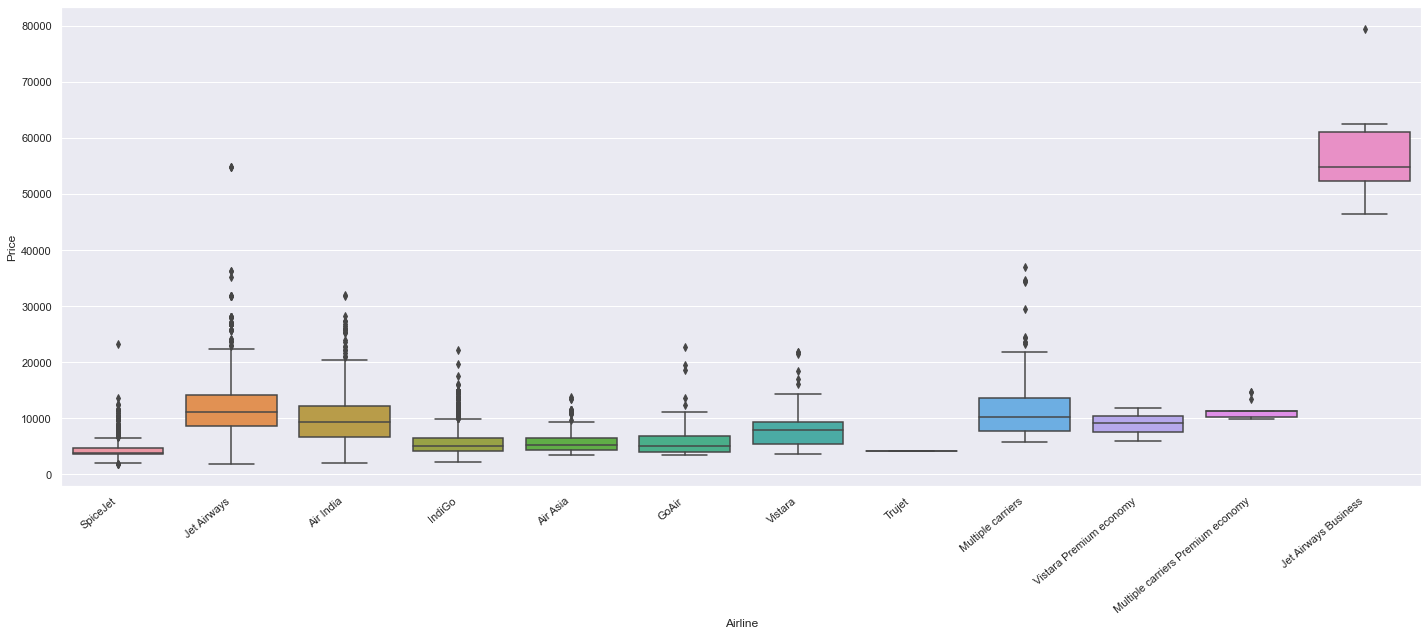

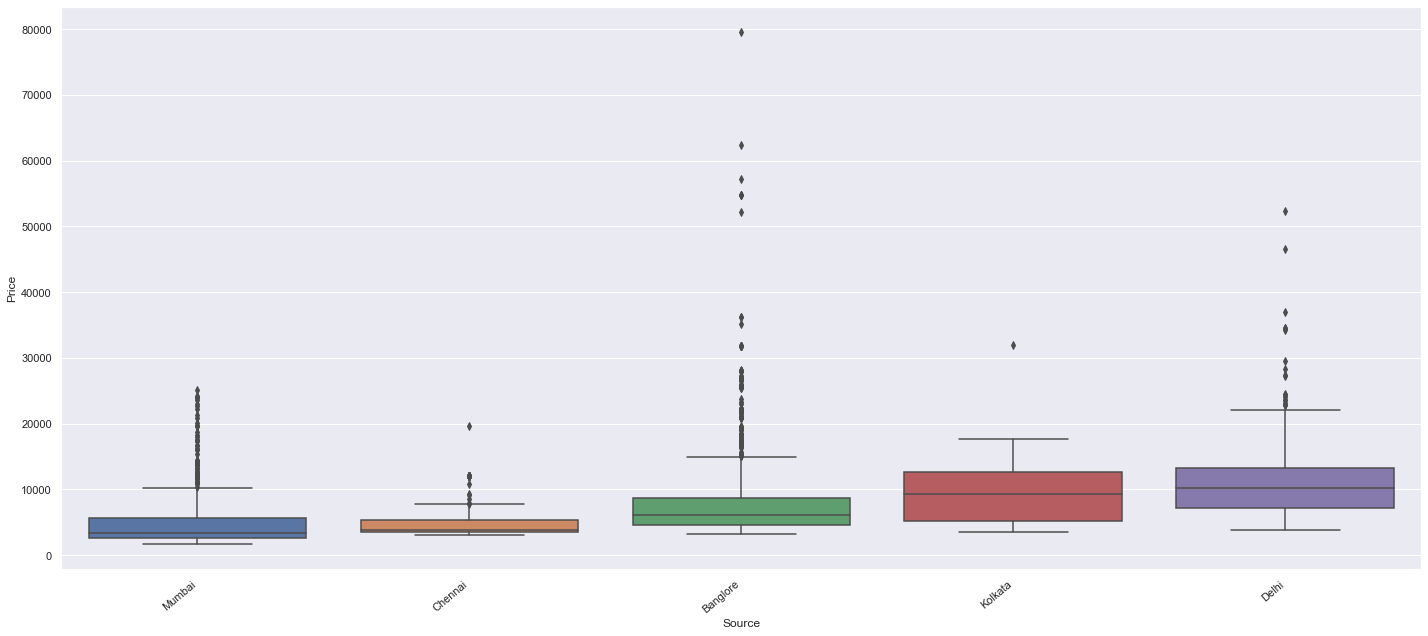

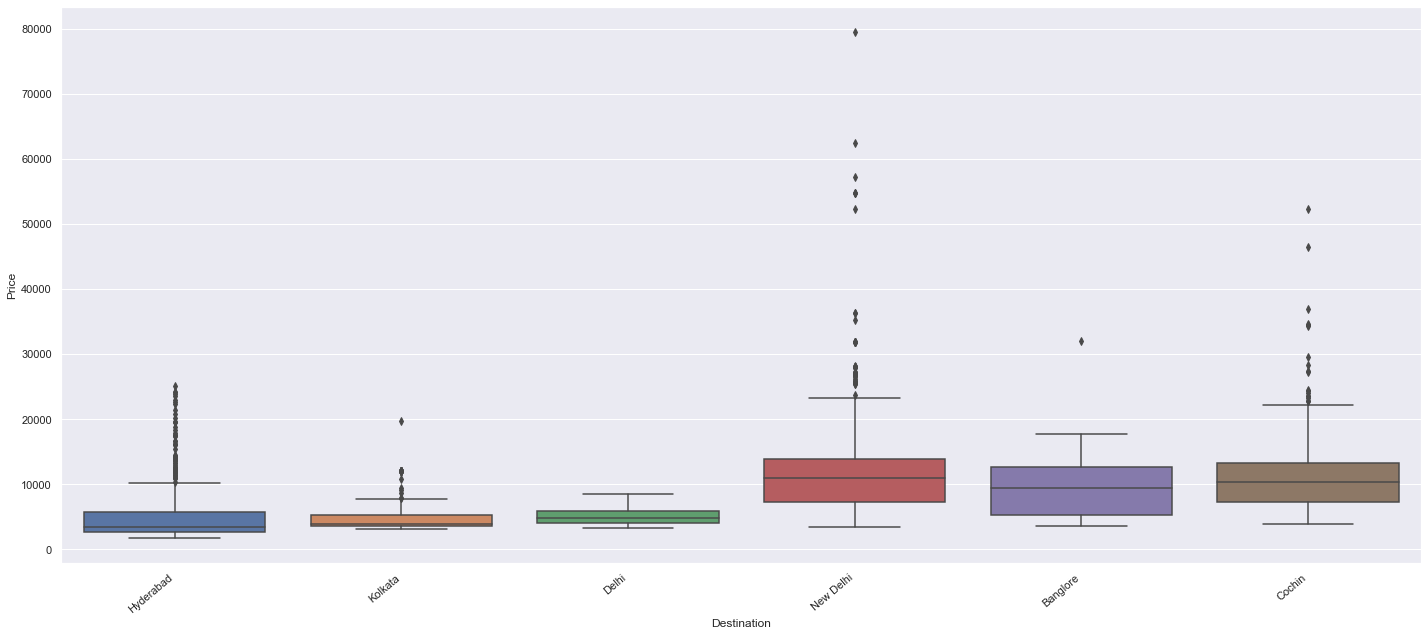

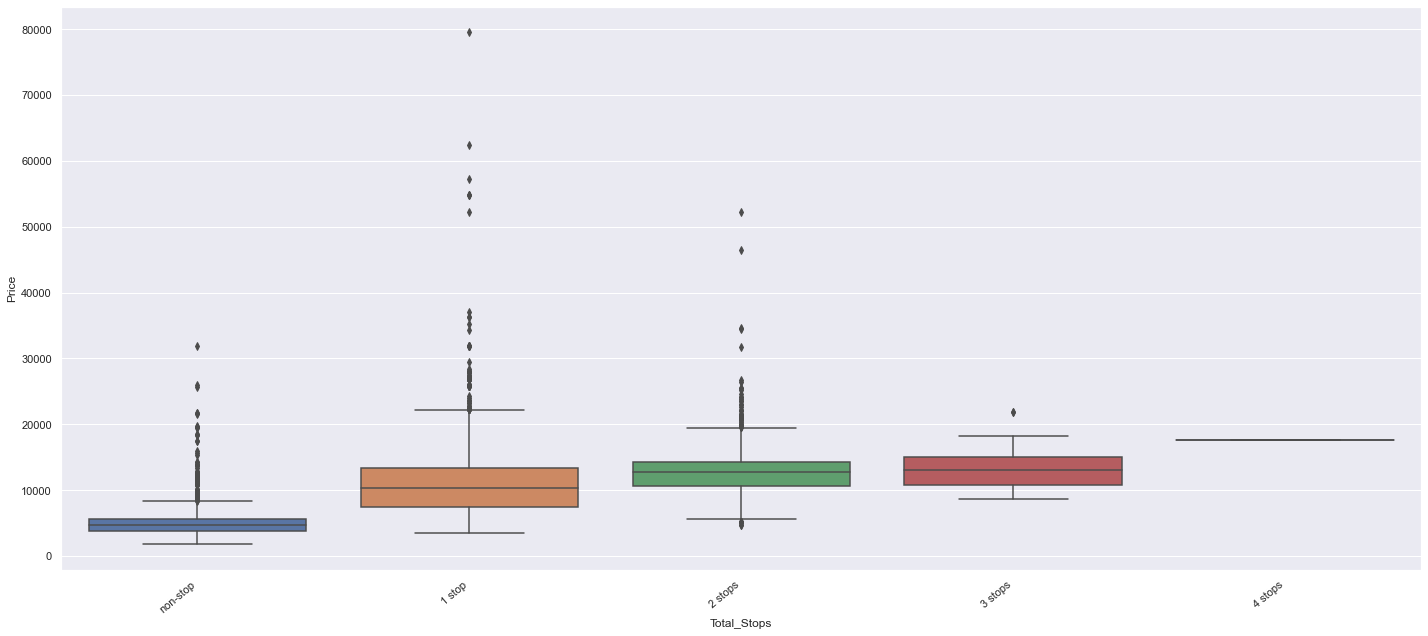

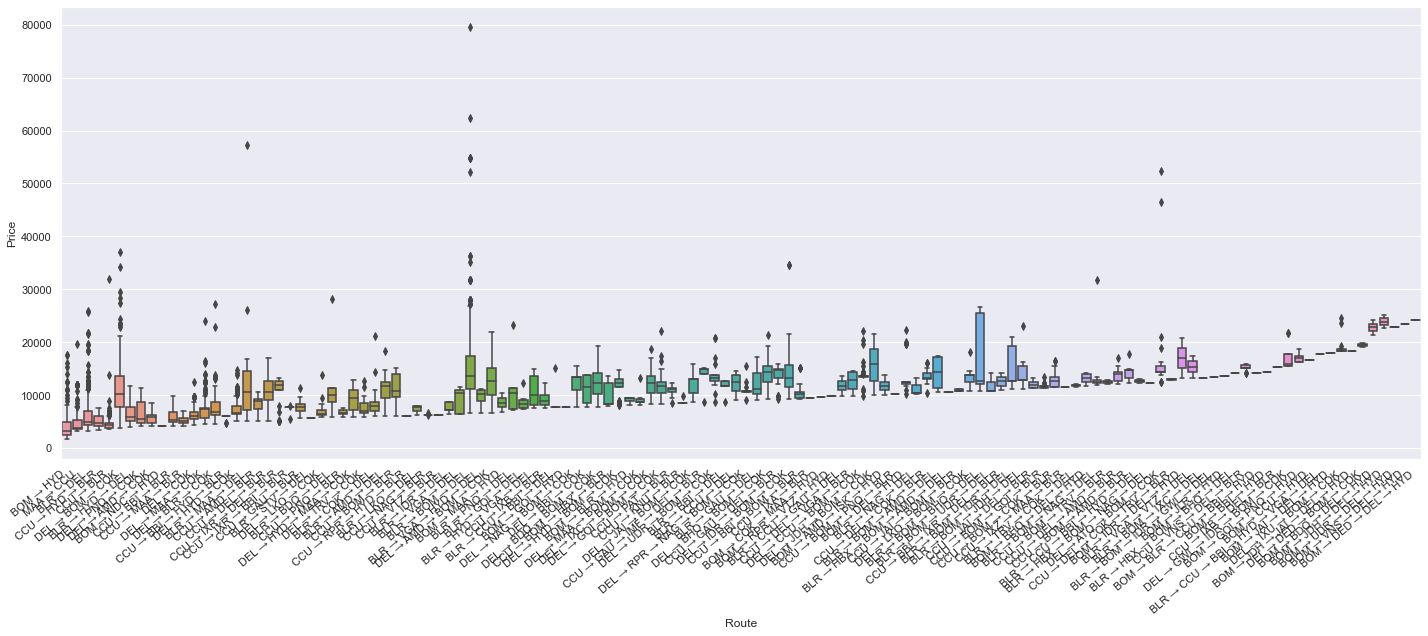

In [36]:
# Box Plot 
for i in ['Airline', 'Source', 'Destination', 'Total_Stops','Route']:
    plt.figure(figsize=(20,9))
    axis = sns.boxplot(x=i,y='Price', data=df.sort_values('Price',ascending=True))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

#### Insights

### Total Stops

In [37]:
# Frequency of each category of Total_Stops
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# Label Encoder
df['Total_Stops']=df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [39]:
df.head()

Airline    Source Destination                  Route  Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL            0   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK            2   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR            1   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL            1   

   Price  Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0   3897                  170                 22                   20   
1   7662                  445                  5                   50   
2  13882                 1140                  9                   25   
3   6218                  325                 18                    5   
4  13302                  285                 16                   50   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  Month  
0                      1                       10   24      3  
1                     13                       15    5      1  
2                      4                       25    6      9  
3                     23                       30    5     12  
4                     21                       35    3      1

In [40]:
print('In Testdataset')
# Frequency of each category of Total_Stops
df1['Total_Stops'].value_counts()
# Label Encoder
df1['Total_Stops']=df1['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In Testdataset


#### Parallel Coordinates Plot

In [41]:
# To understand the source and destination considering total stops
## Creating parallel categories chart
# Import go 
import plotly.express as px
import plotly.graph_objects as go
# Create dimensions
# Source
source_dim = go.parcats.Dimension(
    values=df["Source"], categoryorder="category ascending", label="Source"
)
# Airline
airline_dim = go.parcats.Dimension(
    values=df["Airline"], label="Airline"
)
# Destination
destination_dim = go.parcats.Dimension(
    values=df["Destination"], label="Destination"
)
# Total Stops
total_stops_dim = go.parcats.Dimension(
    values=df["Total_Stops"],
    label="Total Stops",
    categoryarray=[0,1,2,3,4],
    ticktext=["non-stop", "1-stop", "2-stops", "3-stops", "4-stops"],
)
# Create parcats trace
color = df["Total_Stops"]
#colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']]
colorscale = 'Electric'
#colorscale = px.colors.diverging.Tealrose
# create figure object
fig = go.Figure(
    data=[
        go.Parcats(
            dimensions=[
                source_dim,
                destination_dim,
                airline_dim,
                total_stops_dim
            ],
            line={"color": color, "colorscale": colorscale},
            hoveron="color",
            hoverinfo="count + probability",
            labelfont={"size": 18, "family": "Times"},
            tickfont={"size": 16, "family": "Times"},
            arrangement="freeform",
        )
    ]
)
# display the figure
fig.show()

#### Insights

### Airline

In [42]:
# Check the frequency of each category in Airline
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
# Sort the airlines with average value of price
df.groupby('Airline').describe()['Price'].sort_values('mean', ascending =False)

count          mean           std  \
Airline                                                                 
Jet Airways Business                  6.0  58358.666667  11667.596748   
Jet Airways                        3700.0  11599.021081   4315.671402   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Air India                          1694.0   9556.608028   3937.875634   
Vistara Premium economy               3.0   8962.333333   2915.405518   
Vistara                             478.0   7801.355649   2915.288625   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2043.0   5668.469897   2266.933697   
Air Asia                            319.0   5590.260188   2027.362290   
SpiceJet                            815.0   4335.841718   1851.144678   
Trujet                                1.0   4140.000000           NaN   

                                       min       25%      50%       75%  \
Airline                                                                   
Jet Airways Business               46490.0  52243.00  54747.0  61122.50   
Jet Airways                         1840.0   8586.00  11134.0  14151.00   
Multiple carriers Premium economy   9845.0  10161.00  11269.0  11269.00   
Multiple carriers                   5797.0   7723.00  10197.0  13587.00   
Air India                           2050.0   6597.75   9316.0  12199.00   
Vistara Premium economy             5969.0   7547.00   9125.0  10459.00   
Vistara                             3687.0   5403.00   7980.0   9345.00   
GoAir                               3398.0   3898.00   5135.0   6811.25   
IndiGo                              2227.0   4226.00   5000.0   6493.00   
Air Asia                            3383.0   4282.00   5162.0   6451.00   
SpiceJet                            1759.0   3573.00   3873.0   4760.00   
Trujet                              4140.0   4140.00   4140.0   4140.00   

                                       max  
Airline                                     
Jet Airways Business               79512.0  
Jet Airways                        54826.0  
Multiple carriers Premium economy  14629.0  
Multiple carriers                  36983.0  
Air India                          31945.0  
Vistara Premium economy            11793.0  
Vistara                            21730.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Air Asia                           13774.0  
SpiceJet                           23267.0  
Trujet                              4140.0

In [44]:
# One Hot Encoding: Create new column for each category of Airline Feature
Airline = pd.get_dummies(df['Airline'], drop_first=True)
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

In [45]:
# Concatinate Airline dataframe with main dataframe.
df = pd.concat([df, Airline], axis = 1)
# Drop useless column Airline
df.drop('Airline', axis=1, inplace=True)
df.head()

Source Destination                  Route  Total_Stops  Price  \
0  Banglore   New Delhi              BLR → DEL            0   3897   
1   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   7662   
2     Delhi      Cochin  DEL → LKO → BOM → COK            2  13882   
3   Kolkata    Banglore        CCU → NAG → BLR            1   6218   
4  Banglore   New Delhi        BLR → NAG → DEL            1  13302   

   Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0                  170                 22                   20   
1                  445                  5                   50   
2                 1140                  9                   25   
3                  325                 18                    5   
4                  285                 16                   50   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  ...  GoAir  IndiGo  \
0                      1                       10  ...      0       1   
1                     13                       15  ...      0       0   
2                      4                       25  ...      0       0   
3                     23                       30  ...      0       1   
4                     21                       35  ...      0       1   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            0                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  0   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 23 columns]

In [46]:
print('In Testdataset')
Airline = pd.get_dummies(df1['Airline'], drop_first=True)
# Concatinate Airline dataframe with main dataframe.
df1 = pd.concat([df1, Airline], axis = 1)
# Drop useless column Airline
df1.drop('Airline', axis=1, inplace=True)
df1.head()

In Testdataset


Source Destination            Route  Total_Stops  Duration_in_Minutes  \
0     Delhi      Cochin  DEL → BOM → COK            1                  655   
1   Kolkata    Banglore  CCU → MAA → BLR            1                  240   
2     Delhi      Cochin  DEL → BOM → COK            1                 1425   
3     Delhi      Cochin  DEL → BOM → COK            1                  780   
4  Banglore       Delhi        BLR → DEL            0                  170   

   Dep_Time_in_hours  Dep_Time_in_minutes  Arrival_Time_in_hours  \
0                 17                   30                      4   
1                  6                   20                     10   
2                 19                   15                     19   
3                  8                    0                     21   
4                 23                   55                      2   

   Arrival_Time_in_minutes  Day  ...  Air India  GoAir  IndiGo  Jet Airways  \
0                       25    6  ...          0      0       0            1   
1                       20    5  ...          0      0       1            0   
2                        0   21  ...          0      0       0            1   
3                        0   21  ...          0      0       0            0   
4                       45   24  ...          0      0       0            0   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                     0                  0                                  0   
1                     0                  0                                  0   
2                     0                  0                                  0   
3                     0                  1                                  0   
4                     0                  0                                  0   

   SpiceJet  Vistara  Vistara Premium economy  
0         0        0                        0  
1         0        0                        0  
2         0        0                        0  
3         0        0                        0  
4         0        0                        0  

[5 rows x 21 columns]

### Source & Destination

In [47]:
# Check the frequency of each category of Source and Destination Features
li = ['Source', 'Destination']
for i in li:
    print(df[[i]].value_counts(),'\n')

Source  
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
dtype: int64 

Destination
Cochin         4345
Banglore       2860
Delhi          1265
New Delhi       914
Hyderabad       697
Kolkata         381
dtype: int64 



In [48]:
# Create dummies of Source and Destination Feature
df = pd.get_dummies(data=df, columns = li, drop_first= True)
df.head()

Route  Total_Stops  Price  Duration_in_Minutes  \
0              BLR → DEL            0   3897                  170   
1  CCU → IXR → BBI → BLR            2   7662                  445   
2  DEL → LKO → BOM → COK            2  13882                 1140   
3        CCU → NAG → BLR            1   6218                  325   
4        BLR → NAG → DEL            1  13302                  285   

   Dep_Time_in_hours  Dep_Time_in_minutes  Arrival_Time_in_hours  \
0                 22                   20                      1   
1                  5                   50                     13   
2                  9                   25                      4   
3                 18                    5                     23   
4                 16                   50                     21   

   Arrival_Time_in_minutes  Day  Month  ...  Vistara Premium economy  \
0                       10   24      3  ...                        0   
1                       15    5      1  ...                        0   
2                       25    6      9  ...                        0   
3                       30    5     12  ...                        0   
4                       35    3      1  ...                        0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1  

[5 rows x 30 columns]

In [49]:
print('In Testdataset')
# Create dummies of Source and Destination Feature
df1 = pd.get_dummies(data=df1, columns = li, drop_first= True)
df1.head()

In Testdataset


Route  Total_Stops  Duration_in_Minutes  Dep_Time_in_hours  \
0  DEL → BOM → COK            1                  655                 17   
1  CCU → MAA → BLR            1                  240                  6   
2  DEL → BOM → COK            1                 1425                 19   
3  DEL → BOM → COK            1                  780                  8   
4        BLR → DEL            0                  170                 23   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  \
0                   30                      4                       25    6   
1                   20                     10                       20    5   
2                   15                     19                        0   21   
3                    0                     21                        0   21   
4                   55                      2                       45   24   

   Month  Air India  ...  Vistara Premium economy  Source_Chennai  \
0      6          0  ...                        0               0   
1     12          0  ...                        0               0   
2      5          0  ...                        0               0   
3      5          0  ...                        0               0   
4      6          0  ...                        0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0              0                   1   
1             0               1              0                   0   
2             1               0              0                   1   
3             1               0              0                   1   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  1                      0                    0   

   Destination_New Delhi  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 28 columns]

### Route

In [50]:
# Understanding the Route feature
route = df[['Route']]
route.head()

Route
0              BLR → DEL
1  CCU → IXR → BBI → BLR
2  DEL → LKO → BOM → COK
3        CCU → NAG → BLR
4        BLR → NAG → DEL

In [51]:
# Total stops between source and destination
df['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [52]:
# Create 5 new feature column for each stop.
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[3]
route['Route_4']=route['Route'].str.split('→').str[4]
route['Route_5']=route['Route'].str.split('→').str[5]
route.head()

Route Route_1 Route_2 Route_3 Route_4 Route_5
0              BLR → DEL    BLR      DEL     NaN     NaN     NaN
1  CCU → IXR → BBI → BLR    CCU     IXR      BLR     NaN     NaN
2  DEL → LKO → BOM → COK    DEL     LKO      COK     NaN     NaN
3        CCU → NAG → BLR    CCU     NAG      NaN     NaN     NaN
4        BLR → NAG → DEL    BLR     NAG      NaN     NaN     NaN

In [53]:
# Fill the NaN value with None
route.fillna('None', inplace=True)
route.head()

Route Route_1 Route_2 Route_3 Route_4 Route_5
0              BLR → DEL    BLR      DEL    None    None    None
1  CCU → IXR → BBI → BLR    CCU     IXR      BLR    None    None
2  DEL → LKO → BOM → COK    DEL     LKO      COK    None    None
3        CCU → NAG → BLR    CCU     NAG     None    None    None
4        BLR → NAG → DEL    BLR     NAG     None    None    None

In [54]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(1,6):
    col = 'Route_'+ str(i)
    route[col]=le.fit_transform(route[col]) # Transfer text into numeric form
route.drop('Route', axis=1, inplace =True)
route.head()

Route_1  Route_2  Route_3  Route_4  Route_5
0        0       13       13        5        1
1        2       25        3        5        1
2        3       32        5        5        1
3        2       34       13        5        1
4        0       34       13        5        1

In [55]:
# Concatinate Route Dataframe into main dataframe
df = pd.concat([df, route], axis = 1)
# Drop the useless feature Route now
df.drop('Route',axis=1, inplace=True)
df.head()

Total_Stops  Price  Duration_in_Minutes  Dep_Time_in_hours  \
0            0   3897                  170                 22   
1            2   7662                  445                  5   
2            2  13882                 1140                  9   
3            1   6218                  325                 18   
4            1  13302                  285                 16   

   Dep_Time_in_minutes  Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  \
0                   20                      1                       10   24   
1                   50                     13                       15    5   
2                   25                      4                       25    6   
3                    5                     23                       30    5   
4                   50                     21                       35    3   

   Month  Air India  ...  Destination_Cochin  Destination_Delhi  \
0      3          0  ...                   0                  0   
1      1          1  ...                   0                  0   
2      9          0  ...                   1                  0   
3     12          0  ...                   0                  0   
4      1          0  ...                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  Route_1  \
0                      0                    0                      1        0   
1                      0                    0                      0        2   
2                      0                    0                      0        3   
3                      0                    0                      0        2   
4                      0                    0                      1        0   

   Route_2  Route_3  Route_4  Route_5  
0       13       13        5        1  
1       25        3        5        1  
2       32        5        5        1  
3       34       13        5        1  
4       34       13        5        1  

[5 rows x 34 columns]

In [56]:
print('In Testdataset')
route = df1[['Route']]
# Create 5 new feature column for each stop.
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[3]
route['Route_4']=route['Route'].str.split('→').str[4]
route['Route_5']=route['Route'].str.split('→').str[5]
# Fill the NaN value with None
route.fillna('None', inplace=True)
# Label Encoder
le = LabelEncoder()
for i in range(1,6):
    col = 'Route_'+ str(i)
    route[col]=le.fit_transform(route[col]) # Transfer text into numeric form
route.drop('Route', axis=1, inplace =True)
# Concatinate Route Dataframe into main dataframe
df1 = pd.concat([df1, route], axis = 1)
# Drop the useless feature Route now
df1.drop('Route',axis=1, inplace=True)
df1.head()

In Testdataset


Total_Stops  Duration_in_Minutes  Dep_Time_in_hours  Dep_Time_in_minutes  \
0            1                  655                 17                   30   
1            1                  240                  6                   20   
2            1                 1425                 19                   15   
3            1                  780                  8                    0   
4            0                  170                 23                   55   

   Arrival_Time_in_hours  Arrival_Time_in_minutes  Day  Month  Air India  \
0                      4                       25    6      6          0   
1                     10                       20    5     12          0   
2                     19                        0   21      5          0   
3                     21                        0   21      5          0   
4                      2                       45   24      6          0   

   GoAir  ...  Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0      0  ...                   1                  0                      0   
1      0  ...                   0                  0                      0   
2      0  ...                   1                  0                      0   
3      0  ...                   1                  0                      0   
4      0  ...                   0                  1                      0   

   Destination_Kolkata  Destination_New Delhi  Route_1  Route_2  Route_3  \
0                    0                      0        3        7        9   
1                    0                      0        2       29        9   
2                    0                      0        3        7        9   
3                    0                      0        3        7        9   
4                    0                      0        0       13        9   

   Route_4  Route_5  
0        4        1  
1        4        1  
2        4        1  
3        4        1  
4        4        1  

[5 rows x 32 columns]

In [57]:
# Create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'red','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

#### Filtering Numericals and Categoricals columns

In [58]:
# Extracted categorical columns having non-unique value less than 50
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=50:
        if col!='Price':
            categ_columns.append(col) 
print('categorical numericals columns are {}'.format(categ_columns))

categorical numericals columns are ['Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


In [59]:
# Extracted numerical columns
Num_cols = [col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols)) 
Num_cols.remove('Price') # Removing Price (output feature)
Num_cols

numericals columns are ['Price', 'Duration_in_Minutes']


['Duration_in_Minutes']

### <span style="color:forestgreen">Univariate Analysis After Feature Engineering</span>

#### Distplot of Numerical Features

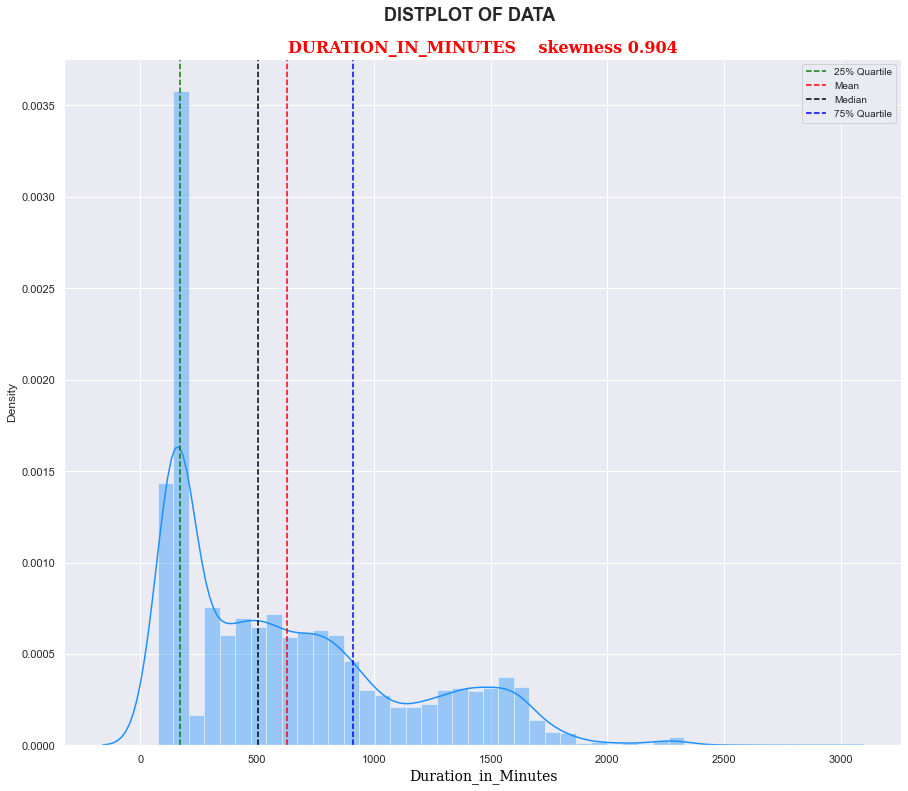

In [60]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[15,12])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(1, 1, i+1)
    ax = sns.distplot(df[col],  color='dodgerblue')
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

In [61]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue', 'green', 'red', 'blue'];

#### Outliers Detection in Numerical Features

In [62]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# Numerical_features = ["Duration_in_Minutes"]
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Duration_in_Minutes    True
dtype: bool

#### Visualization of outliers using box plot

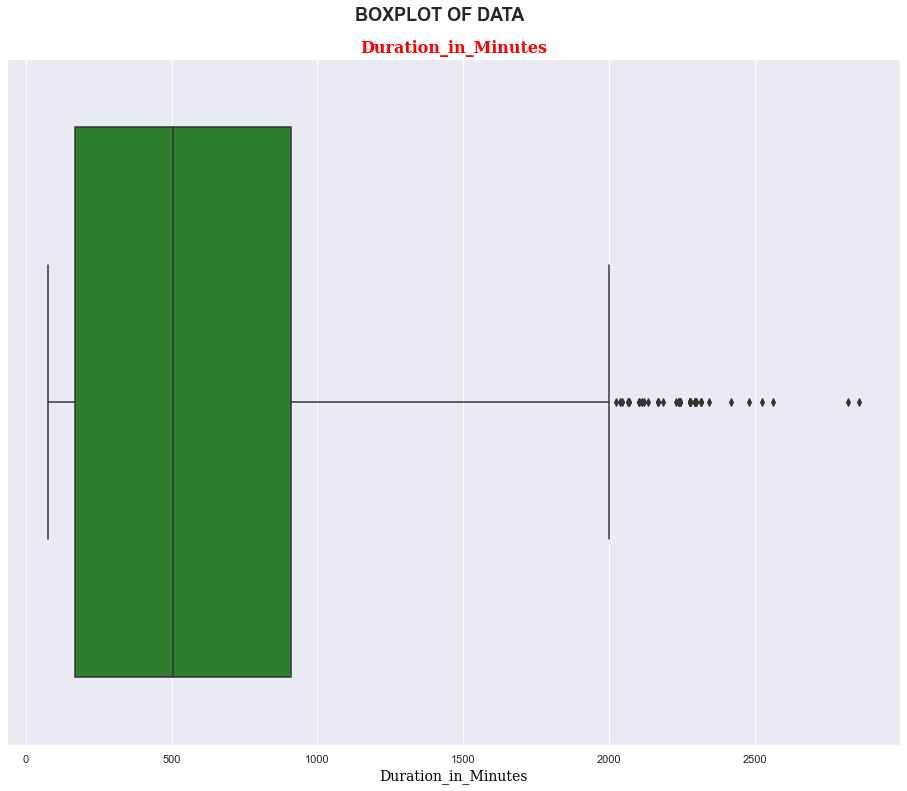

In [63]:
# Create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(1, 1, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

#### Outliers Detection

In [64]:
# Finding the IQR For Duration_in_Minutes columns
dict = {}
for col in ['Duration_in_Minutes']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [65]:
# Find upper limit and lower limit
dict

{'upper_limit_Duration_in_Minutes': 2020.0,
 'lower_limit_Duration_in_Minutes': -940.0}

In [66]:
# Number of data in the range
for col in ['Duration_in_Minutes']:
    print('There are total {} data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 data which Duration_in_Minutes are less than lower limit.
There are total 75 data which Duration_in_Minutes are more than upper limit.


#### Capping Duration_in_Minutes with upper limit and lower limit.

In [67]:
# Removing the outliers
for col in ['Duration_in_Minutes']:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

#### After Outliers treatment

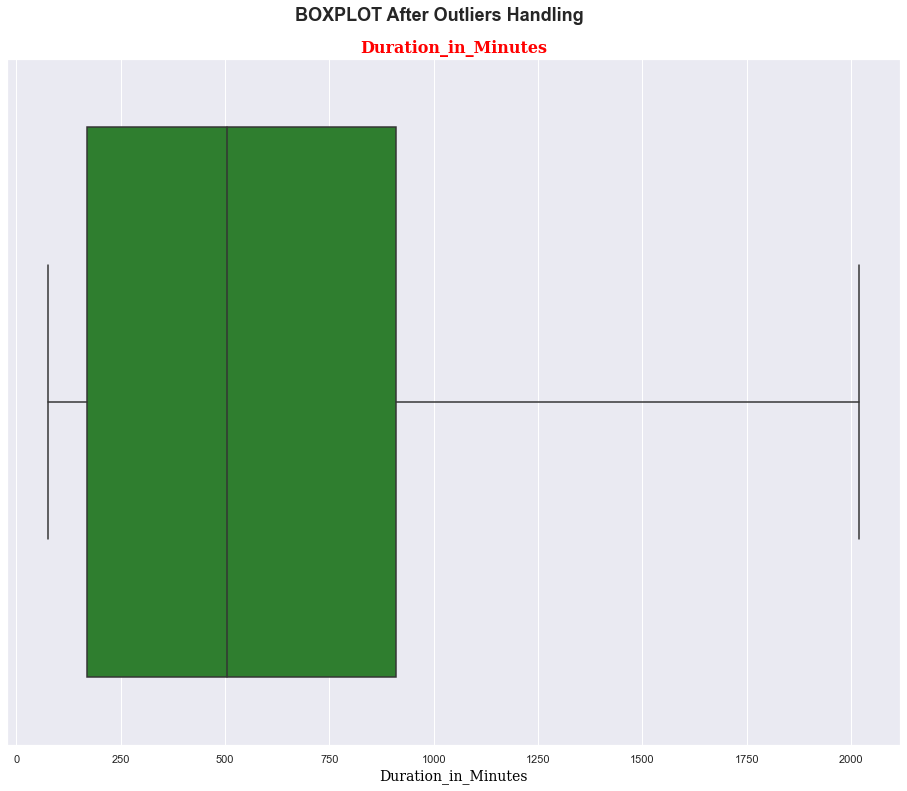

In [68]:
# Create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT After Outliers Handling', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate( ['Duration_in_Minutes']):  
    ax1 = fig.add_subplot(1, 1, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

### <span style="color:forestgreen">Correlation Analysis</span>

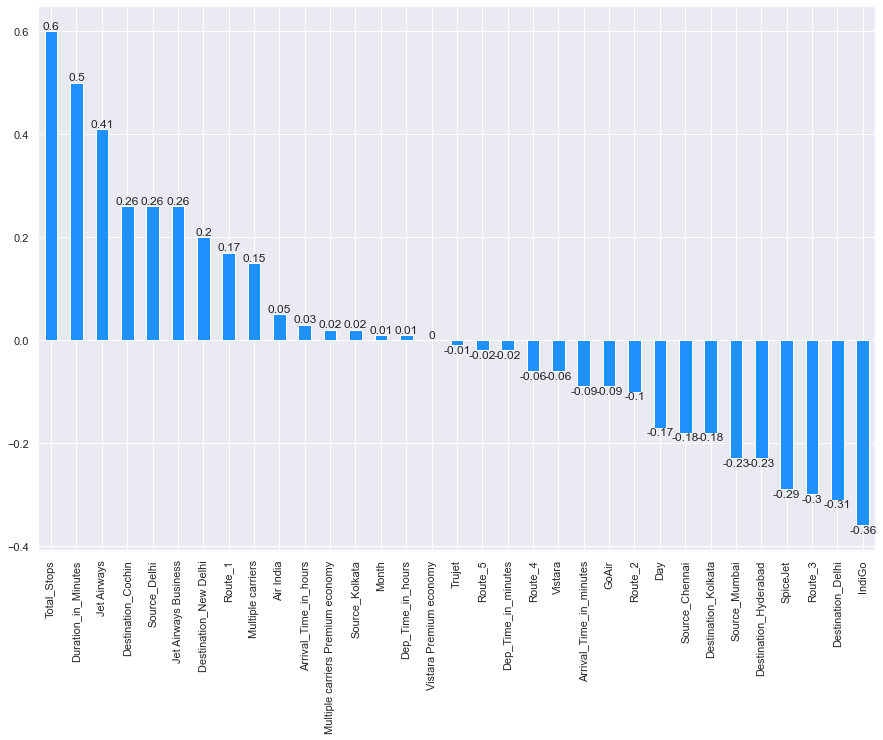

In [69]:
# Correlation with output feature
ax = round(df.corr()['Price'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (15,10))
ax.bar_label(ax.containers[0])
plt.show()

In [70]:
# Name of columns
df.columns

Index(['Total_Stops', 'Price', 'Duration_in_Minutes', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [71]:
# I have dropped the feature which is not correlated with output feature
df.drop('Vistara Premium economy',axis=1, inplace=True)
df.drop('Trujet',axis=1, inplace=True)

In [72]:
# I have dropped the feature which is not correlated with output feature in Testdataset
df1.drop('Vistara Premium economy',axis=1, inplace=True)
df1.columns
# There is no feature as Trujet

Index(['Total_Stops', 'Duration_in_Minutes', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

### <span style="color:forestgreen">Heatmap</span>

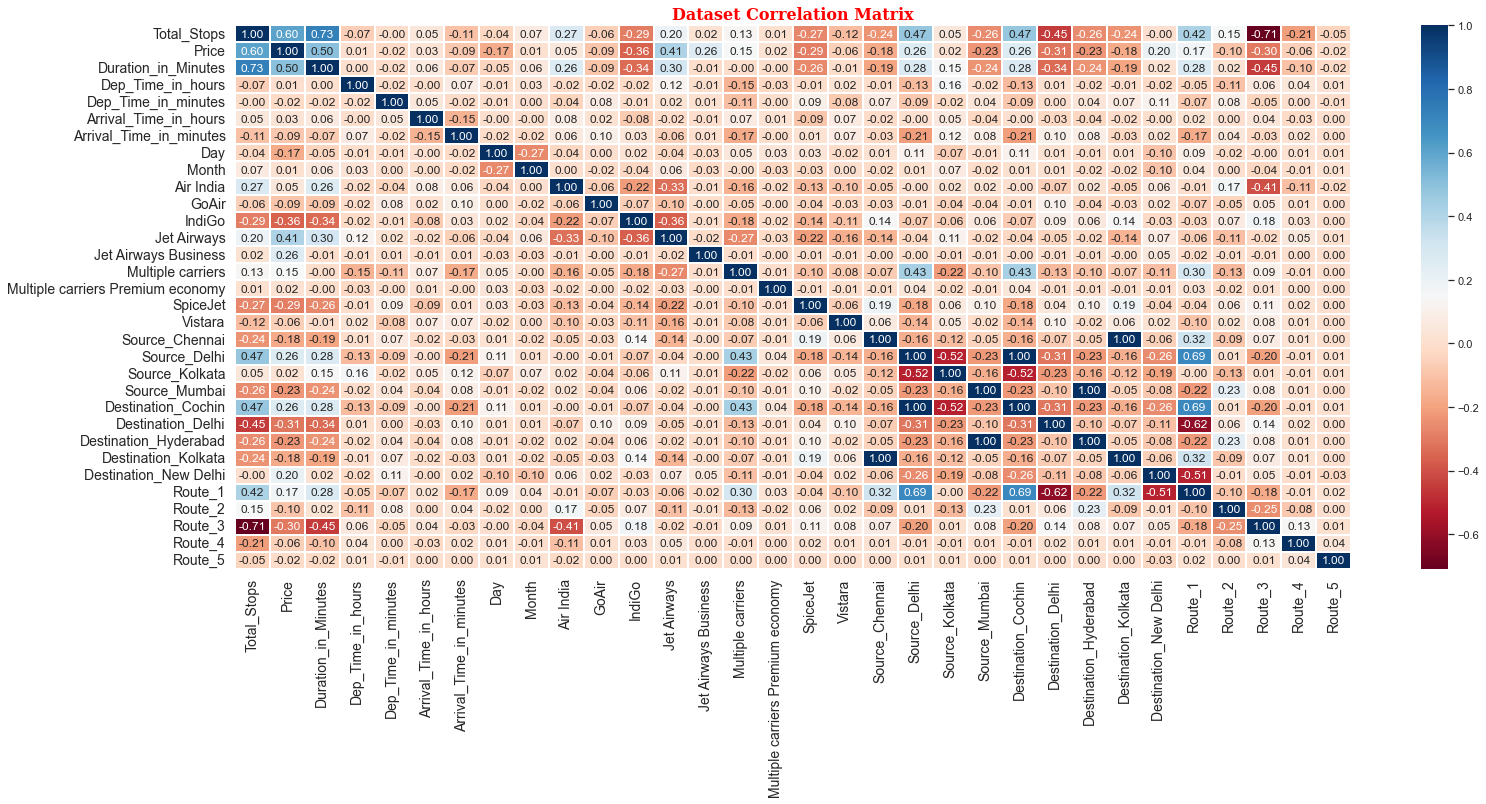

In [73]:
# Plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[25,10])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

In [74]:
# I have dropped the one of feature having correlation coffecient more than 0.75 or less than -0.75
df.drop('Source_Chennai',axis=1, inplace=True)
df.drop('Source_Delhi',axis=1, inplace=True)
df.drop('Source_Mumbai',axis=1, inplace=True)

In [75]:
# I have dropped the one of feature having correlation coffecient more than 0.75 or less than -0.75
print('In Testdataset')
df1.drop('Source_Chennai',axis=1, inplace=True)
df1.drop('Source_Delhi',axis=1, inplace=True)
df1.drop('Source_Mumbai',axis=1, inplace=True)

In Testdataset


In [76]:
# Check final shape of dataframe
df.shape

(10462, 29)

In [77]:
df1.shape

(2671, 28)

In [78]:
df1.columns

Index(['Total_Stops', 'Duration_in_Minutes', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Source_Kolkata', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [79]:
df.columns

Index(['Total_Stops', 'Price', 'Duration_in_Minutes', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Source_Kolkata', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

### <span style="color:forestgreen">Feature Scaling</span>

In [80]:
# Divided the data into two part x and y. Where, x is independent variable and y is dependent variable or target variable 
x = df.drop(columns=['Price']).values  
y = df['Price'].values 
test = df1.values

In [81]:
# Convert Dataset into min_max scale
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
test = MinMaxScaler().fit_transform(test)
print(len(x[0]),len(test[0]))

28 28


## <span style="color:Blue">Modelling</span>

In [82]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from math import sqrt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold

In [83]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [84]:
# Function to find mean absolute % error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### <span style="color:forestgreen">Linear Regression</span>

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [86]:
print('In Training:')
print('R^2 Score:', lr.score(X_train, y_train))

In Training:
R^2 Score: 0.635230837446288


In [87]:
print('In Testing:')
print('R^2 Score:',r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_pred)))

In Testing:
R^2 Score: 0.5891203530185101
MAE: 1990.3567397276636
MSE: 8659553.702376131
RMSE: 2942.7119638823183
Mean Absolute % Error:  24


### <span style="color:forestgreen">Polynomial Regression</span>

In [88]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [89]:
print('In Training:')
y_pred = lin2.predict(poly.fit_transform(X_test))
y_pred_train = lin2.predict(poly.fit_transform(X_train))
print('R^2 Score:', r2_score(y_train,y_pred_train))

In Training:
R^2 Score: 0.749512189036575


In [90]:
print('In Testing:')
print('R^2 Score:',r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_pred)))

In Testing:
R^2 Score: 0.7094978693209486
MAE: 1670.9612995699952
MSE: 6122519.866220736
RMSE: 2474.3726207305026
Mean Absolute % Error:  20


### <span style="color:forestgreen">Random Forest</span>

In [91]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [92]:
print('In Training:')
print('R^2 Score:', reg_rf.score(X_train, y_train))

In Training:
R^2 Score: 0.9563058579454177


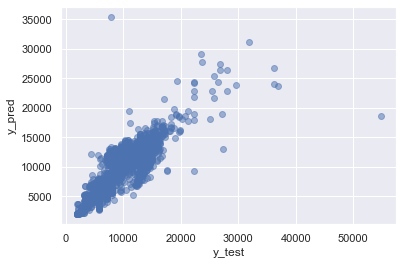

In [93]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
print('In Testing:')
print('R^2 Score:',metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))

In Testing:
R^2 Score: 0.7878071202681171
MAE: 1189.6940853104002
MSE: 4472101.869243622
RMSE: 2114.734467786351
Mean absolute % error:  13


### <span style="color:forestgreen">Random Forest with Hyperparameter Tuning</span>

In [95]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [96]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [97]:
# Random search of parameters, using 5 fold cross validation, 
# Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,n_jobs=-1,)
rf_random.fit(X_train,y_train)

# Best parameter
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [98]:
y_prediction = rf_random.predict(X_test)
y_train_pred = rf_random.predict(X_train)

In [99]:
print('In Training:')
print('R^2 Score:', r2_score(y_train, y_train_pred))

In Training:
R^2 Score: 0.9109610017263171


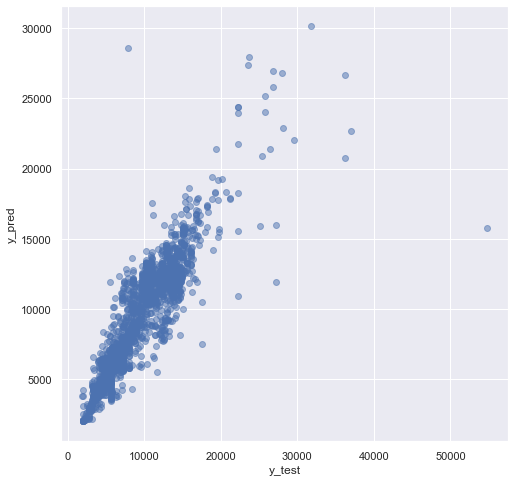

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [101]:
print('In Testing:')
print('R^2 Score:',metrics.r2_score(y_test, y_prediction))
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_prediction)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

In Testing:
R^2 Score: 0.8102497692153647
MAE: 1151.5555267030434
MSE: 3999108.5603513424
Mean Absolute % Error:  13
RMSE: 1999.7771276698168


### <span style="color:forestgreen">XGB Regressor with Hyperparameter Tuning</span>

In [102]:
# Grid Search CV
param_grid = {'alpha': [0.9,0.09,0.1,0.7,0.05,0.125],'learning_rate':[0.75,0.5,0.25,0.1,0.01],
              'max_depth':[2,3,4,5,6],'n_estimators':[125,110, 100, 90, 75]}
xgb = XGBRegressor()
gcv_xgb= GridSearchCV(xgb, param_grid, scoring='neg_mean_absolute_error',cv=5, n_jobs=5, verbose=True)
res = gcv_xgb.fit(X_train,y_train)
res.best_params_

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


{'alpha': 0.125, 'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 125}

In [103]:
y_train_pred = gcv_xgb.predict(X_train)
y_test_pred = gcv_xgb.predict(X_test)

In [104]:
print('In Training:')
print('R^2 Score:',r2_score(y_train,y_train_pred))

In Training:
R^2 Score: 0.939514690300579


In [105]:
print('In Testing:')
print("R^2 Score: ", r2_score(y_test, y_test_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In Testing:
R^2 Score:  0.8010810080632778
MAE: 1171.368478190882
MSE: 4192346.118268962
Mean Absolute % Error:  13
RMSE: 2047.5219457356159


### <span style="color:forestgreen">Weighted Average Ensemble</span>

In [111]:
from sklearn.ensemble import VotingRegressor
# To get a list of best models
def get_models():
    models = list()
    models.append(('Random Forest with Hyperparameter Tuning', rf_random))
    models.append(('XGB Regressor with Hyperparameter Tuning', gcv_xgb))
    return models
# To evaluate each base model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    # Fit and evaluate the models
    scores = list()
    for name,model in models:
        # Fit the model
        model.fit(X_train,y_train)
        # Evaluate the model
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        # Store the performance
        scores.append(r2)
    return scores
models = get_models()
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
#print(scores)
# Create the ensemble
ensemble = VotingRegressor(estimators=models, weights=scores)
# Fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 750 candidates, totalling 3750 fits


VotingRegressor(estimators=[('Random Forest with Hyperparameter Tuning',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(),
                                                n_jobs=-1,
                                                param_distributions={'max_depth': [5,
                                                                                   10,
                                                                                   15,
                                                                                   20,
                                                                                   25,
                                                                                   30],
                                                                     'max_features': ['auto',
                                                                                      'sqrt'],
                    

In [112]:
print('In Training:')
y_pred_train = ensemble.predict(X_train)
print('Weighted R^2 Score: ',r2_score(y_train, y_pred_train))

In Training:
Weighted R^2 Score:  0.9373067777327595


In [113]:
# Make predictions on test set
y_pred = ensemble.predict(X_test)
# Evaluate predictions
print('Weighted R^2 Score: ', r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Weighted R^2 Score:  0.814014843905648
MAE: 1168.4181861910208
MSE: 3919757.181636215
Mean Absolute % Error:  13
RMSE: 1979.8376654756862


### <span style="color:forestgreen">Prediction of Flight Prices with Weighted Average Ensemble for Test Data</span>

In [122]:
# Make predictions on test set
y_test_pred = ensemble.predict(test)
Test_Result = pd.DataFrame(y_test_pred, columns=['Price'])
# converting 'Test_Result' from float to int
Test_Result['Price'] = Test_Result['Price'].apply(np.int64)
Test_Result

Price
0     11488
1      4688
2     13987
3     10078
4      4091
...     ...
2666   8604
2667   4947
2668  16074
2669  14576
2670   8381

[2671 rows x 1 columns]

In [120]:
Test_Result.dtypes

Price    int64
dtype: object

In [121]:
Test_Result.shape

(2671, 1)

In [123]:
# Write dataframe to excel
Test_Result.to_csv('Test_Result.csv')

In [125]:
import pickle

In [126]:
# Saving model to disk
pickle.dump(ensemble,open('model.pkl','wb'))